### #  '240,010,403' : 즉석식품

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/we/Downloads/업무/buy it again_분석 '

./chunk/

---

## # 즉석식품 데이터 사용 : '240,010,403'

In [3]:
retort_train = pd.read_excel('retort_train.xlsx')
retort_test = pd.read_excel('retort_test.xlsx')

In [4]:
retort_train.head(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8,8,2018-01-01 00:00:02,"23,119,672","9,900","3,095,067","240,010,403",1
185,185,2018-01-01 00:00:46,"13,719,818","63,260","3,043,235","240,010,403",1
186,186,2018-01-01 00:00:46,"6,673,847","41,040","1,890,228","240,010,403",1


In [5]:
retort_train.tail(3)

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
9110140,99110140,2018-07-31 23:59:42,"20,144,042","19,800","3,875,978","240,010,403",1
9110255,99110255,2018-07-31 23:59:51,"3,447,745","32,500","3,675,138","240,010,403",1
9110269,99110269,2018-07-31 23:59:52,"2,918,378","17,900","3,877,762","240,010,403",1


In [6]:
retort_train.m_id.nunique()   # 약 52만명()

526724

In [7]:
train_mid = retort_train.m_id.unique()

In [8]:
# train_mid[0] 의 구매내역

retort_train[retort_train.m_id == train_mid[0]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
8,8,2018-01-01 00:00:02,"23,119,672","9,900","3,095,067","240,010,403",1
7600948,87600948,2018-07-08 12:02:38,"23,119,672","9,777","3,807,057","240,010,403",1


---

### #  time interval 불러오기

In [9]:
tt = pd.read_csv('retort_train_time_interval.csv', header=None)

In [10]:
tt.head()

,0,1,2,3,4,5,6
0,52,2018-04-18T23:04:04.000+09:00,"1,010,299","3,000","3,569,399","240,010,403",1
1,1,2018-04-19T00:22:10.000+09:00,"1,010,299","5,500","3,574,914","240,010,403",1
2,36,2018-02-08T12:15:57.000+09:00,"1,011,295","13,900","2,823,873","240,010,403",1
3,13,2018-02-21T12:05:27.000+09:00,"1,011,295","13,900","2,823,873","240,010,403",1
4,102,2018-06-03T16:33:42.000+09:00,"1,011,295","15,900","3,714,756","240,010,403",1


In [11]:
tt.columns = ['time','biz_dt', 'm_id', 'order_price', 'prod_no', 'old_admin_category_id', 'serv_cd']

In [12]:
tt = tt.iloc[:,:1]

In [13]:
tt.head()

,time
0,52
1,1
2,36
3,13
4,102


---

# # t (interval) 분석해보자

In [22]:
tt.shape

(401967, 1)

In [23]:
tt = tt.dropna()  # t값 순수하게 얻은거야 - 중원대리님이 뽑아준거에서는 아마 없을거야!

In [24]:
# nan값 제거하고 얻은 shape : 13만 6천개 (전체 - distinct user의 수 (1개 제품 구매자 포함) )

tt.shape

(401967, 1)

In [25]:
tt.head()

,time
0,52
1,1
2,36
3,13
4,102


In [26]:
#음 중원대리님이 뽑아주신 데이터에서는 0이 없어!

tt.time.value_counts()

1      14561
2      10792
3       9557
7       9515
6       9013
4       8946
5       8683
8       8376
14      8274
13      7707
10      7547
9       7514
12      7130
15      7119
11      6960
21      6908
16      6634
20      6603
17      6202
18      6152
22      6149
19      6005
28      5933
23      5425
27      5379
24      5366
26      5325
29      5287
25      5214
35      4837
       ...  
183      164
178      156
186      146
187      144
188      140
185      126
184      122
189      116
191      109
196      109
194      101
190       98
195       95
192       85
193       81
198       63
197       62
199       57
204       55
200       51
203       47
201       43
202       43
205       39
208       30
206       29
207       24
209       24
210       11
211        8
Name: time, Length: 211, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cd432b0>]],
      dtype=object)

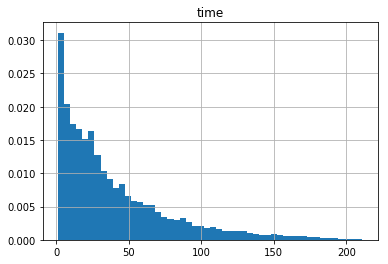

In [27]:
tt.hist(bins=50, density = True)

---

### # test id 데이터에서 뽑아오자

In [28]:
# Test_id : 테스트 데이터에서, unique한 id 1000개

test_id = retort_test.m_id.unique()[:1000]

In [29]:
len(test_id)

1000

---

In [30]:
# test_id 1000개중에서, train기록 가지고있는 애들만 활용해본다!

tf = []
for i in range(len(test_id)):
    tf.append( bool(retort_train[retort_train.m_id == test_id[i]].shape[0]) 
              & bool(retort_test[retort_test.m_id == test_id[i]].shape[0]) == True) #train, test 둘다 있는 아이디를 밝혀주는 index만들어주는거야.

In [25]:
tf

[True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 Tr

In [31]:
len(test_id)

1000

In [32]:
len(test_id[tf]) # train data를 가지고있는 애들(67% 정도네!)

646

In [33]:
test_id_ = test_id[tf]

---

# ----------------------------------------------------------------------------------------

---

## * lambda라는 개념을 다시 잡기.
poisson(lambda) : 이때의 lambda는 단위시간 당 사건의 평균적인 발생 횟수. - 이를 추정하기 위해, 단위 시간 당 사건의 발생횟수의 분포를 본다.


## # 1/time 을 감마 피팅 하자.
: time들의 분포를 알고있다 -> 단위 시간 당, 사건의 발생횟수를 맞춰줄 수 있다. 예를 들어, user들로부터 t=(3일,4일,5일,6일)이라는 time-interval을 얻게 되었다고 하자.

 이때, 단위 시간 당 사건의 발생 횟수 X=(1/3, 1/4, 1/5, 1/6)이고, 이 분포를 이용해 poisson(lambda)를 추정하는 것이다.

In [37]:
tt.mean()   # 평균 39일?

time    39.689395
dtype: float64

In [38]:
# tt의 inverse를 사용할 것이다.

tt_inver = 1/tt

In [39]:
tt_inver.head()

,time
0,0.019231
1,1.000000
2,0.027778
3,0.076923
4,0.009804


In [40]:
1/tt_inver.mean()

time    9.41034
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e456d8>]],
      dtype=object)

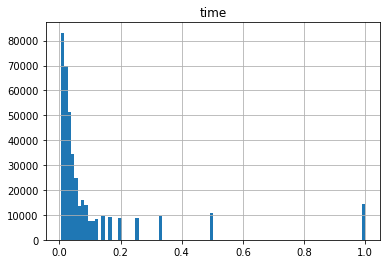

In [41]:
tt_inver.hist(bins=90)

In [42]:
# unit time - 일주일

tt_inver7 = tt_inver*7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a240292b0>]],
      dtype=object)

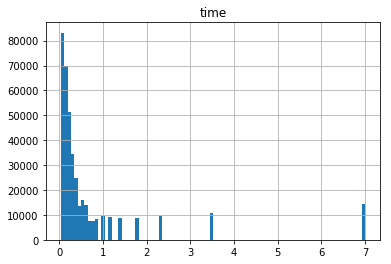

In [43]:
tt_inver7.hist(bins=90)

In [44]:
tt_inver7.mean()

time    0.743863
dtype: float64

In [45]:
1/tt_inver7.mean()

time    1.344334
dtype: float64

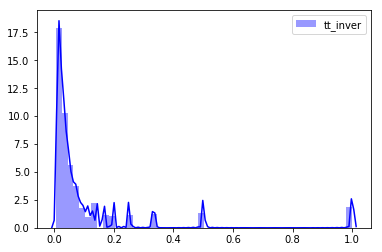

In [46]:
# tt_inver 의 분포를 살펴보는거야

plt.figure()
sns.distplot( tt_inver, color = 'blue', label='tt_inver')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

---

### # (1) gamma.fit으로 parameters 추정해볼게.

In [68]:
alpha, _ , scale = stats.gamma.fit(tt_inver, floc=0) 

In [69]:
alpha, scale

(0.6882067506495457, 0.15441011647401656)

In [70]:
1/scale    #Beta

6.476259605492076

In [89]:
# 함수로 출력되는게 많게했어!

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current - train[train.m_id == test_id].iloc[-1].biz_dt).days  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt - train[train.m_id == test_id].iloc[0].biz_dt).days
    k = train.biz_dt[train.m_id == test_id].shape[0] # train 구매이력
    if k <= 1 :
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        tmean_u = train.biz_dt[train.m_id == test_id].diff().mean().days
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    return lamb, t_, t_purch, tmean_u, k

---

### # 1주일 단위로

In [50]:
# 1주윌 단위로 계산 -> 하루 단위에서 7배 해주면 되지.

tt_inver7 = tt_inver*7

In [51]:
tt_inver7.time.value_counts()

7.000000    14561
3.500000    10792
2.333333     9557
1.000000     9515
1.166667     9013
1.750000     8946
1.400000     8683
0.875000     8376
0.500000     8274
0.538462     7707
0.700000     7547
0.777778     7514
0.583333     7130
0.466667     7119
0.636364     6960
0.333333     6908
0.437500     6634
0.350000     6603
0.411765     6202
0.388889     6152
0.318182     6149
0.368421     6005
0.250000     5933
0.304348     5425
0.259259     5379
0.291667     5366
0.269231     5325
0.241379     5287
0.280000     5214
0.200000     4837
            ...  
0.038251      164
0.039326      156
0.037634      146
0.037433      144
0.037234      140
0.037838      126
0.038043      122
0.037037      116
0.035714      109
0.036649      109
0.036082      101
0.036842       98
0.035897       95
0.036458       85
0.036269       81
0.035354       63
0.035533       62
0.035176       57
0.034314       55
0.035000       51
0.034483       47
0.034653       43
0.034826       43
0.034146       39
0.033654  

In [52]:
print(tt_inver.shape[0], sum(tt_inver7.time == 7.0)  )  # 40만개중에, 약 14,561 개가 time-interval=1이야

# tt_invr7 == 7 이라는 의미는, 1주일 단위에 구매가 '7번'일어나는 사람들의 frequency를 보여주는거야!(사실은, 하루에 한번 산 사람들!) 

401967 14561


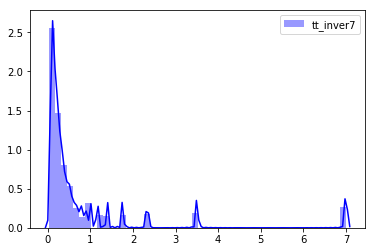

In [53]:
plt.figure()
sns.distplot( tt_inver7, color = 'blue', label='tt_inver7')
plt.legend()
#plt.xlim(-3,55)

plt.show()
plt.close()

In [54]:
alpha_, _ , scale_ = stats.gamma.fit(tt_inver7, floc=0) 

In [55]:
alpha_, scale_

(0.6882067506495457, 1.0808708153181152)

In [56]:
tt_inver7.mean()

time    0.743863
dtype: float64

In [57]:
alpha_*scale_   # tt_inver7.mean() == alpha_*scale_

0.7438625916820053

In [58]:
import scipy.stats as stats

In [59]:
y = stats.gamma.rvs(a = alpha_, loc=0, scale=scale_, size=1000, random_state=None)

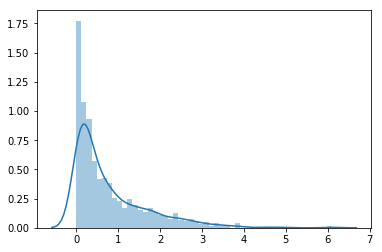

In [60]:
plt.figure()
sns.distplot(y, bins=50)


---

### # 계산

In [60]:
retort_train.biz_dt[retort_train.m_id == test_id_[1]]

3320648   2018-01-07 14:59:37
5548451   2018-01-12 01:41:27
7965515   2018-05-06 19:44:25
9103746   2018-07-31 23:49:12
9108224   2018-07-31 23:56:49
Name: biz_dt, dtype: datetime64[ns]

In [61]:
retort_train.biz_dt.dt.date[retort_train.m_id == test_id_[1]].nunique()

4

## # 임시 완성

In [131]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days/7
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days/7 == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()/7
        
    lamb = (k+alpha)/(t_purch+2*abs(tmean_u-t_)+beta)
    
    return lamb, t_, t_purch, tmean_u, k

In [62]:
# 설정한 current에서 한달 정도의 기간을 만들어준다.

current_l = pd.date_range('2018-08-01', periods=30).tolist()

In [63]:
alpha_, scale_

(0.6882067506495457, 1.0808708153181152)

## # 검증

In [103]:
current_l[0].date()

datetime.date(2018, 8, 1)

In [134]:
func_lamb(retort_train, retort_test, test_id_[1], current = current_l[0], alpha = alpha_, beta=1/scale_, tmean = tt.mean().item()/7)

(0.09480894960928289,
 0.14285714285714285,
 29.285714285714285,
 9.761904761904761,
 4)

In [135]:
func_lamb(retort_train, retort_test, test_id_[182], current = current_l[0], alpha = alpha_, beta=1/scale_, tmean = tt.mean().item()/7)

(0.7688040394180363, 2.2857142857142856, 2.0, 2.0, 2)

---

In [67]:
retort_train[retort_train.m_id == test_id_[1]]

,Unnamed: 0,biz_dt,m_id,order_price,prod_no,old_admin_category_id,serv_cd
3320648,3320648,2018-01-07 14:59:37,"17,508,303","21,430","1,890,228","240,010,403",1
5548451,5548451,2018-01-12 01:41:27,"17,508,303","11,200","2,177,816","240,010,403",1
7965515,57965515,2018-05-06 19:44:25,"17,508,303","19,080","2,913,115","240,010,403",1
9103746,99103746,2018-07-31 23:49:12,"17,508,303","21,000","3,875,393","240,010,403",1
9108224,99108224,2018-07-31 23:56:49,"17,508,303","24,500","3,875,393","240,010,403",1


In [68]:
y = retort_train.biz_dt[retort_train.m_id == test_id_[1]].dt.date.diff().dt.days

In [69]:
y = y.replace(0, np.NaN)

In [70]:
y

3320648      NaN
5548451      5.0
7965515    114.0
9103746     86.0
9108224      NaN
Name: biz_dt, dtype: float64

In [71]:
(5+114+86)/3

68.33333333333333

In [74]:
y.mean()  # mean 함수는 NaN값 제외하고 한다네~

68.33333333333333

In [75]:
tmean_u = y.mean()/7

In [76]:
tmean_u  # 같다!

9.761904761904761

---

## # test

In [77]:
len(test_id_)

646

In [79]:
d = {}

for j in range(len(test_id_[:200])):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    d[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], 'current-last_order:', t_ , 't_purch:', t_purch)  
        print('pred:',(1-stats.poisson.pmf(mu = lamb, k=0)),', tmean_u:',tmean_u,', k:',k ,'\n')
        d[j].append( (1-stats.poisson.pmf(mu = lamb, k=0)) )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 3.857142857142857 t_purch: 24.285714285714285
pred: 0.12991925647186953 , tmean_u: 8.095238095238095 , k: 4 

current: 2018-08-02 00:00:00 current-last_order: 4.0 t_purch: 24.285714285714285
pred: 0.13095442742455654 , tmean_u: 8.095238095238095 , k: 4 

current: 2018-08-03 00:00:00 current-last_order: 4.142857142857143 t_purch: 24.285714285714285
pred: 0.13200619717454598 , tmean_u: 8.095238095238095 , k: 4 

current: 2018-08-04 00:00:00 current-last_order: 4.285714285714286 t_purch: 24.285714285714285
pred: 0.1330749673969528 , tmean_u: 8.095238095238095 , k: 4 

current: 2018-08-05 00:00:00 current-last_order: 4.428571428571429 t_purch: 24.285714285714285
pred: 0.13416115280424168 , tmean_u: 8.095238095238095 , k: 4 

current: 2018-08-06 00:00:00 current-last_order: 4.571428571428571 t_purch: 24.285714285714285
pred: 0.13526518167822743 , tmean_u:

current: 2018-08-22 00:00:00 current-last_order: 3.0 t_purch: 29.285714285714285
pred: 0.10165086132670043 , tmean_u: 9.761904761904761 , k: 4 

current: 2018-08-23 00:00:00 current-last_order: 3.142857142857143 t_purch: 29.285714285714285
pred: 0.10228389226816004 , tmean_u: 9.761904761904761 , k: 4 

current: 2018-08-24 00:00:00 current-last_order: 3.2857142857142856 t_purch: 29.285714285714285
pred: 0.10292484879158681 , tmean_u: 9.761904761904761 , k: 4 

current: 2018-08-25 00:00:00 current-last_order: 3.4285714285714284 t_purch: 29.285714285714285
pred: 0.10357388051108496 , tmean_u: 9.761904761904761 , k: 4 

current: 2018-08-26 00:00:00 current-last_order: 3.5714285714285716 t_purch: 29.285714285714285
pred: 0.10423114082583285 , tmean_u: 9.761904761904761 , k: 4 

current: 2018-08-27 00:00:00 current-last_order: 3.7142857142857144 t_purch: 29.285714285714285
pred: 0.1048967870403873 , tmean_u: 9.761904761904761 , k: 4 

current: 2018-08-28 00:00:00 current-last_order: 3.857142

current: 2018-08-17 00:00:00 current-last_order: 10.857142857142858 t_purch: 0.0
pred: 0.13877854983962834 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 11.0 t_purch: 0.0
pred: 0.13559948822974044 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-19 00:00:00 current-last_order: 11.142857142857142 t_purch: 0.0
pred: 0.13256255407082063 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 11.285714285714286 t_purch: 0.0
pred: 0.12965844203852472 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 11.428571428571429 t_purch: 0.0
pred: 0.12687864023142548 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 11.571428571428571 t_purch: 0.0
pred: 0.12421534753795938 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 11.714285714285714 t_purch: 0.0
pred: 0.12166140109874413 , tmean_u: 5.669913557225202 , k: 1 


current: 2018-08-09 00:00:00 current-last_order: 1.4285714285714286 t_purch: 22.285714285714285
pred: 0.1648874735039001 , tmean_u: 5.607142857142857 , k: 5 

current: 2018-08-10 00:00:00 current-last_order: 1.5714285714285714 t_purch: 22.285714285714285
pred: 0.16626071980313495 , tmean_u: 5.607142857142857 , k: 5 

current: 2018-08-11 00:00:00 current-last_order: 1.7142857142857142 t_purch: 22.285714285714285
pred: 0.1676569612183012 , tmean_u: 5.607142857142857 , k: 5 

current: 2018-08-12 00:00:00 current-last_order: 1.8571428571428572 t_purch: 22.285714285714285
pred: 0.16907677819708544 , tmean_u: 5.607142857142857 , k: 5 

current: 2018-08-13 00:00:00 current-last_order: 2.0 t_purch: 22.285714285714285
pred: 0.17052077081158146 , tmean_u: 5.607142857142857 , k: 5 

current: 2018-08-14 00:00:00 current-last_order: 2.142857142857143 t_purch: 22.285714285714285
pred: 0.17198955959097495 , tmean_u: 5.607142857142857 , k: 5 

current: 2018-08-15 00:00:00 current-last_order: 2.2857142

current: 2018-08-30 00:00:00 current-last_order: 4.285714285714286 t_purch: 19.142857142857142
pred: 0.41630230152584013 , tmean_u: 1.6071428571428572 , k: 13 

------------------------------------------------------------------------


user:[7] last order: 496677   2018-03-09 23:04:00
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 20.571428571428573 t_purch: 0.0
pred: 0.0534580271892483 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 20.714285714285715 t_purch: 0.0
pred: 0.05297883096103084 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 20.857142857142858 t_purch: 0.0
pred: 0.05250814728767206 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 21.0 t_purch: 0.0
pred: 0.052045751394192874 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 21.142857142857142 t_purch: 0.0
pred: 0.051591426348186475 , 

current: 2018-08-23 00:00:00 current-last_order: 12.142857142857142 t_purch: 20.714285714285715
pred: 0.2116137888228884 , tmean_u: 2.5892857142857144 , k: 9 

current: 2018-08-24 00:00:00 current-last_order: 12.285714285714286 t_purch: 20.714285714285715
pred: 0.21030744840216387 , tmean_u: 2.5892857142857144 , k: 9 

current: 2018-08-25 00:00:00 current-last_order: 12.428571428571429 t_purch: 20.714285714285715
pred: 0.2090170548062693 , tmean_u: 2.5892857142857144 , k: 9 

current: 2018-08-26 00:00:00 current-last_order: 12.571428571428571 t_purch: 20.714285714285715
pred: 0.2077423194952408 , tmean_u: 2.5892857142857144 , k: 9 

current: 2018-08-27 00:00:00 current-last_order: 12.714285714285714 t_purch: 20.714285714285715
pred: 0.20648296080269235 , tmean_u: 2.5892857142857144 , k: 9 

current: 2018-08-28 00:00:00 current-last_order: 12.857142857142858 t_purch: 20.714285714285715
pred: 0.20523870373389752 , tmean_u: 2.5892857142857144 , k: 9 

current: 2018-08-29 00:00:00 current-

current: 2018-08-18 00:00:00 current-last_order: 6.428571428571429 t_purch: 0.0
pred: 0.49901597126842745 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-19 00:00:00 current-last_order: 6.571428571428571 t_purch: 0.0
pred: 0.46140775035279014 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 6.714285714285714 t_purch: 0.0
pred: 0.4288684774616375 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 6.857142857142857 t_purch: 0.0
pred: 0.40048473601641266 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 7.0 t_purch: 0.0
pred: 0.37553631193800796 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 7.142857142857143 t_purch: 0.0
pred: 0.3534526750995174 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 7.285714285714286 t_purch: 0.0
pred: 0.33377855012364777 , tmean_u: 5.669913557225202 , k: 1 

current:

current: 2018-08-10 00:00:00 current-last_order: 5.571428571428571 t_purch: 25.714285714285715
pred: 0.13343507331357063 , tmean_u: 8.619047619047619 , k: 4 

current: 2018-08-11 00:00:00 current-last_order: 5.714285714285714 t_purch: 25.714285714285715
pred: 0.1345271582703118 , tmean_u: 8.619047619047619 , k: 4 

current: 2018-08-12 00:00:00 current-last_order: 5.857142857142857 t_purch: 25.714285714285715
pred: 0.13563723256546079 , tmean_u: 8.619047619047619 , k: 4 

current: 2018-08-13 00:00:00 current-last_order: 6.0 t_purch: 25.714285714285715
pred: 0.13676574344634573 , tmean_u: 8.619047619047619 , k: 4 

current: 2018-08-14 00:00:00 current-last_order: 6.142857142857143 t_purch: 25.714285714285715
pred: 0.13791315307547625 , tmean_u: 8.619047619047619 , k: 4 

current: 2018-08-15 00:00:00 current-last_order: 6.285714285714286 t_purch: 25.714285714285715
pred: 0.1390799391559172 , tmean_u: 8.619047619047619 , k: 4 

current: 2018-08-16 00:00:00 current-last_order: 6.42857142857

current: 2018-08-04 00:00:00 current-last_order: 27.428571428571427 t_purch: 0.0
pred: 0.037273886677557155 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 27.571428571428573 t_purch: 0.0
pred: 0.037040254275189866 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 27.714285714285715 t_purch: 0.0
pred: 0.03680953209344562 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 27.857142857142858 t_purch: 0.0
pred: 0.036581666099049004 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 28.0 t_purch: 0.0
pred: 0.03635660358796444 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 28.142857142857142 t_purch: 0.0
pred: 0.03613429314477623 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 28.285714285714285 t_purch: 0.0
pred: 0.03591468460354841 , tmean_u: 5.669913557225202 , k: 

current: 2018-08-28 00:00:00 current-last_order: 8.0 t_purch: 25.857142857142858
pred: 0.15358643676360662 , tmean_u: 8.666666666666666 , k: 4 

current: 2018-08-29 00:00:00 current-last_order: 8.142857142857142 t_purch: 25.857142857142858
pred: 0.15503417192554136 , tmean_u: 8.666666666666666 , k: 4 

current: 2018-08-30 00:00:00 current-last_order: 8.285714285714286 t_purch: 25.857142857142858
pred: 0.15650938777502954 , tmean_u: 8.666666666666666 , k: 4 

------------------------------------------------------------------------


user:[16] last order: 3719222   2018-07-01 19:38:20
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 4.285714285714286 t_purch: 24.428571428571427
pred: 0.2226575330410654 , tmean_u: 4.885714285714286 , k: 6 

current: 2018-08-02 00:00:00 current-last_order: 4.428571428571429 t_purch: 24.428571428571427
pred: 0.22478423079471066 , tmean_u: 4.885714285714286 , k: 6 

current: 2018-08-03 00:00:00 current-last_order: 4.5714

current: 2018-08-19 00:00:00 current-last_order: 3.0 t_purch: 29.571428571428573
pred: 0.10040799596752215 , tmean_u: 9.904761904761903 , k: 4 

current: 2018-08-20 00:00:00 current-last_order: 3.142857142857143 t_purch: 29.571428571428573
pred: 0.10102561002228772 , tmean_u: 9.904761904761903 , k: 4 

current: 2018-08-21 00:00:00 current-last_order: 3.2857142857142856 t_purch: 29.571428571428573
pred: 0.10165086132670043 , tmean_u: 9.904761904761903 , k: 4 

current: 2018-08-22 00:00:00 current-last_order: 3.4285714285714284 t_purch: 29.571428571428573
pred: 0.10228389226816004 , tmean_u: 9.904761904761903 , k: 4 

current: 2018-08-23 00:00:00 current-last_order: 3.5714285714285716 t_purch: 29.571428571428573
pred: 0.10292484879158681 , tmean_u: 9.904761904761903 , k: 4 

current: 2018-08-24 00:00:00 current-last_order: 3.7142857142857144 t_purch: 29.571428571428573
pred: 0.10357388051108496 , tmean_u: 9.904761904761903 , k: 4 

current: 2018-08-25 00:00:00 current-last_order: 3.85714

current: 2018-08-12 00:00:00 current-last_order: 5.857142857142857 t_purch: 4.285714285714286
pred: 0.2751542142161352 , tmean_u: 4.285714285714286 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 6.0 t_purch: 4.285714285714286
pred: 0.26739916141393816 , tmean_u: 4.285714285714286 , k: 2 

current: 2018-08-14 00:00:00 current-last_order: 6.142857142857143 t_purch: 4.285714285714286
pred: 0.26006546531337305 , tmean_u: 4.285714285714286 , k: 2 

current: 2018-08-15 00:00:00 current-last_order: 6.285714285714286 t_purch: 4.285714285714286
pred: 0.25312002982915127 , tmean_u: 4.285714285714286 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 6.428571428571429 t_purch: 4.285714285714286
pred: 0.2465330977699033 , tmean_u: 4.285714285714286 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 6.571428571428571 t_purch: 4.285714285714286
pred: 0.24027784562591714 , tmean_u: 4.285714285714286 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 6.714285714285714 t

current: 2018-08-06 00:00:00 current-last_order: 7.571428571428571 t_purch: 12.714285714285714
pred: 0.20673340079104974 , tmean_u: 6.428571428571429 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 7.714285714285714 t_purch: 12.714285714285714
pred: 0.20348879660779118 , tmean_u: 6.428571428571429 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 7.857142857142857 t_purch: 12.714285714285714
pred: 0.20034399392845426 , tmean_u: 6.428571428571429 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 8.0 t_purch: 12.714285714285714
pred: 0.1972944811049302 , tmean_u: 6.428571428571429 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 8.142857142857142 t_purch: 12.714285714285714
pred: 0.19433601286801117 , tmean_u: 6.428571428571429 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 8.285714285714286 t_purch: 12.714285714285714
pred: 0.19146459107667435 , tmean_u: 6.428571428571429 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 8.4285714285

current: 2018-08-28 00:00:00 current-last_order: 8.142857142857142 t_purch: 17.428571428571427
pred: 0.17235561941747757 , tmean_u: 8.714285714285714 , k: 3 

current: 2018-08-29 00:00:00 current-last_order: 8.285714285714286 t_purch: 17.428571428571427
pred: 0.17468089023392086 , tmean_u: 8.714285714285714 , k: 3 

current: 2018-08-30 00:00:00 current-last_order: 8.428571428571429 t_purch: 17.428571428571427
pred: 0.17706953896017574 , tmean_u: 8.714285714285714 , k: 3 

------------------------------------------------------------------------


user:[23] last order: 2589579   2018-06-28 22:53:40
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 4.714285714285714 t_purch: 0.0
pred: 0.44854001018536827 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 4.857142857142857 t_purch: 0.0
pred: 0.484106349079625 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 5.0 t_purch: 0.0
pred: 

current: 2018-08-22 00:00:00 current-last_order: 7.285714285714286 t_purch: 4.285714285714286
pred: 0.2181216097602654 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-23 00:00:00 current-last_order: 7.428571428571429 t_purch: 4.285714285714286
pred: 0.21320316966114827 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-24 00:00:00 current-last_order: 7.571428571428571 t_purch: 4.285714285714286
pred: 0.20850052804243957 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-25 00:00:00 current-last_order: 7.714285714285714 t_purch: 4.285714285714286
pred: 0.203999865715634 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-26 00:00:00 current-last_order: 7.857142857142857 t_purch: 4.285714285714286
pred: 0.19968851161333878 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-27 00:00:00 current-last_order: 8.0 t_purch: 4.285714285714286
pred: 0.19555482678178715 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-28 00:00:00 current-last_order: 8.142857142857142 t_

current: 2018-08-14 00:00:00 current-last_order: 7.0 t_purch: 7.857142857142857
pred: 0.22066641875728532 , tmean_u: 8.0 , k: 2 

current: 2018-08-15 00:00:00 current-last_order: 7.142857142857143 t_purch: 7.857142857142857
pred: 0.22593730799443257 , tmean_u: 8.0 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 7.285714285714286 t_purch: 7.857142857142857
pred: 0.23146447790759173 , tmean_u: 8.0 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 7.428571428571429 t_purch: 7.857142857142857
pred: 0.237266932572048 , tmean_u: 8.0 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 7.571428571428571 t_purch: 7.857142857142857
pred: 0.24336558345694648 , tmean_u: 8.0 , k: 2 

current: 2018-08-19 00:00:00 current-last_order: 7.714285714285714 t_purch: 7.857142857142857
pred: 0.24978349176137304 , tmean_u: 8.0 , k: 2 

current: 2018-08-20 00:00:00 current-last_order: 7.857142857142857 t_purch: 7.857142857142857
pred: 0.25654614802457687 , tmean_u: 8.0 , k: 2 

current:

current: 2018-08-09 00:00:00 current-last_order: 5.285714285714286 t_purch: 12.428571428571429
pred: 0.26036936290487833 , tmean_u: 4.190476190476191 , k: 4 

current: 2018-08-10 00:00:00 current-last_order: 5.428571428571429 t_purch: 12.428571428571429
pred: 0.25633209333183327 , tmean_u: 4.190476190476191 , k: 4 

current: 2018-08-11 00:00:00 current-last_order: 5.571428571428571 t_purch: 12.428571428571429
pred: 0.2524170993542534 , tmean_u: 4.190476190476191 , k: 4 

current: 2018-08-12 00:00:00 current-last_order: 5.714285714285714 t_purch: 12.428571428571429
pred: 0.24861896045873066 , tmean_u: 4.190476190476191 , k: 4 

current: 2018-08-13 00:00:00 current-last_order: 5.857142857142857 t_purch: 12.428571428571429
pred: 0.2449325683954524 , tmean_u: 4.190476190476191 , k: 4 

current: 2018-08-14 00:00:00 current-last_order: 6.0 t_purch: 12.428571428571429
pred: 0.24135310529927834 , tmean_u: 4.190476190476191 , k: 4 

current: 2018-08-15 00:00:00 current-last_order: 6.14285714285

user:[30] last order: 8779062   2018-07-10 00:25:56
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 3.0 t_purch: 0.0
pred: 0.23621279588705502 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 3.142857142857143 t_purch: 0.0
pred: 0.24598439320296306 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 3.2857142857142856 t_purch: 0.0
pred: 0.25659230217956264 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 3.4285714285714284 t_purch: 0.0
pred: 0.26814746996708383 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 3.5714285714285716 t_purch: 0.0
pred: 0.2807810767243121 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 3.7142857142857144 t_purch: 0.0
pred: 0.2946492693160788 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 3.8571428

current: 2018-08-27 00:00:00 current-last_order: 4.571428571428571 t_purch: 19.857142857142858
pred: 0.050725447167823456 , tmean_u: 20.0 , k: 2 

current: 2018-08-28 00:00:00 current-last_order: 4.714285714285714 t_purch: 19.857142857142858
pred: 0.05100034395089681 , tmean_u: 20.0 , k: 2 

current: 2018-08-29 00:00:00 current-last_order: 4.857142857142857 t_purch: 19.857142857142858
pred: 0.05127823575909596 , tmean_u: 20.0 , k: 2 

current: 2018-08-30 00:00:00 current-last_order: 5.0 t_purch: 19.857142857142858
pred: 0.051559171795006464 , tmean_u: 20.0 , k: 2 

------------------------------------------------------------------------


user:[32] last order: 6436136   2018-06-14 11:45:51
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 6.714285714285714 t_purch: 0.0
pred: 0.4288684774616375 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 6.857142857142857 t_purch: 0.0
pred: 0.40048473601641266 , tmean_u: 5.6

current: 2018-08-21 00:00:00 current-last_order: 3.5714285714285716 t_purch: 29.428571428571427
pred: 0.27162490218409097 , tmean_u: 3.6785714285714284 , k: 9 

current: 2018-08-22 00:00:00 current-last_order: 3.7142857142857144 t_purch: 29.428571428571427
pred: 0.272708022332087 , tmean_u: 3.6785714285714284 , k: 9 

current: 2018-08-23 00:00:00 current-last_order: 3.857142857142857 t_purch: 29.428571428571427
pred: 0.2705502680950166 , tmean_u: 3.6785714285714284 , k: 9 

current: 2018-08-24 00:00:00 current-last_order: 4.0 t_purch: 29.428571428571427
pred: 0.26842606683425474 , tmean_u: 3.6785714285714284 , k: 9 

current: 2018-08-25 00:00:00 current-last_order: 4.142857142857143 t_purch: 29.428571428571427
pred: 0.26633465074216534 , tmean_u: 3.6785714285714284 , k: 9 

current: 2018-08-26 00:00:00 current-last_order: 4.285714285714286 t_purch: 29.428571428571427
pred: 0.2642752749445739 , tmean_u: 3.6785714285714284 , k: 9 

current: 2018-08-27 00:00:00 current-last_order: 4.42857

current: 2018-08-12 00:00:00 current-last_order: 27.285714285714285 t_purch: 0.0
pred: 0.03751048470522822 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 27.428571428571427 t_purch: 0.0
pred: 0.037273886677557155 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 27.571428571428573 t_purch: 0.0
pred: 0.037040254275189866 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 27.714285714285715 t_purch: 0.0
pred: 0.03680953209344562 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 27.857142857142858 t_purch: 0.0
pred: 0.036581666099049004 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 28.0 t_purch: 0.0
pred: 0.03635660358796444 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 28.142857142857142 t_purch: 0.0
pred: 0.03613429314477623 , tmean_u: 5.669913557225202 , k: 

current: 2018-08-07 00:00:00 current-last_order: 5.857142857142857 t_purch: 24.857142857142858
pred: 0.0900855646719767 , tmean_u: 12.5 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 6.0 t_purch: 24.857142857142858
pred: 0.09071818238170226 , tmean_u: 12.5 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 6.142857142857143 t_purch: 24.857142857142858
pred: 0.09135974075371678 , tmean_u: 12.5 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 6.285714285714286 t_purch: 24.857142857142858
pred: 0.0920104305085776 , tmean_u: 12.5 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 6.428571428571429 t_purch: 24.857142857142858
pred: 0.09267044782525047 , tmean_u: 12.5 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 6.571428571428571 t_purch: 24.857142857142858
pred: 0.09333999453759811 , tmean_u: 12.5 , k: 3 

current: 2018-08-13 00:00:00 current-last_order: 6.714285714285714 t_purch: 24.857142857142858
pred: 0.09401927833940926 , tmean_u: 12.5 , k

current: 2018-08-30 00:00:00 current-last_order: 5.142857142857143 t_purch: 27.571428571428573
pred: 0.2791350750892543 , tmean_u: 3.0634920634920633 , k: 10 

------------------------------------------------------------------------


user:[39] last order: 1513245   2018-03-12 13:30:33
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 20.142857142857142 t_purch: 0.0
pred: 0.05494906423911927 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 20.285714285714285 t_purch: 0.0
pred: 0.05444289778799094 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 20.428571428571427 t_purch: 0.0
pred: 0.053945968947412326 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 20.571428571428573 t_purch: 0.0
pred: 0.0534580271892483 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 20.714285714285715 t_purch: 0.0
pred: 0.052978

current: 2018-08-25 00:00:00 current-last_order: 32.285714285714285 t_purch: 0.0
pred: 0.03069172726471603 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 32.42857142857143 t_purch: 0.0
pred: 0.030533141514612727 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 32.57142857142857 t_purch: 0.0
pred: 0.030376186050357856 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 32.714285714285715 t_purch: 0.0
pred: 0.030220835863151385 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 32.857142857142854 t_purch: 0.0
pred: 0.030067066453066893 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 33.0 t_purch: 0.0
pred: 0.02991485381617598 , tmean_u: 5.669913557225202 , k: 1 

------------------------------------------------------------------------


user:[41] last order: 1865463   2018-04-04 01:21:04
Name: biz_dt, d

current: 2018-08-20 00:00:00 current-last_order: 12.428571428571429 t_purch: 20.0
pred: 0.26009951591982716 , tmean_u: 1.8311688311688312 , k: 12 

current: 2018-08-21 00:00:00 current-last_order: 12.571428571428571 t_purch: 20.0
pred: 0.258596256687039 , tmean_u: 1.8311688311688312 , k: 12 

current: 2018-08-22 00:00:00 current-last_order: 12.714285714285714 t_purch: 20.0
pred: 0.2571101256153888 , tmean_u: 1.8311688311688312 , k: 12 

current: 2018-08-23 00:00:00 current-last_order: 12.857142857142858 t_purch: 20.0
pred: 0.25564083455476416 , tmean_u: 1.8311688311688312 , k: 12 

current: 2018-08-24 00:00:00 current-last_order: 13.0 t_purch: 20.0
pred: 0.2541881017052816 , tmean_u: 1.8311688311688312 , k: 12 

current: 2018-08-25 00:00:00 current-last_order: 13.142857142857142 t_purch: 20.0
pred: 0.252751651445861 , tmean_u: 1.8311688311688312 , k: 12 

current: 2018-08-26 00:00:00 current-last_order: 13.285714285714286 t_purch: 20.0
pred: 0.2513312141682219 , tmean_u: 1.831168831168

current: 2018-08-11 00:00:00 current-last_order: 4.428571428571429 t_purch: 20.714285714285715
pred: 0.26058763752195424 , tmean_u: 4.171428571428572 , k: 6 

current: 2018-08-12 00:00:00 current-last_order: 4.571428571428571 t_purch: 20.714285714285715
pred: 0.25773987648993923 , tmean_u: 4.171428571428572 , k: 6 

current: 2018-08-13 00:00:00 current-last_order: 4.714285714285714 t_purch: 20.714285714285715
pred: 0.2549531656336622 , tmean_u: 4.171428571428572 , k: 6 

current: 2018-08-14 00:00:00 current-last_order: 4.857142857142857 t_purch: 20.714285714285715
pred: 0.2522255815408335 , tmean_u: 4.171428571428572 , k: 6 

current: 2018-08-15 00:00:00 current-last_order: 5.0 t_purch: 20.714285714285715
pred: 0.24955527983821946 , tmean_u: 4.171428571428572 , k: 6 

current: 2018-08-16 00:00:00 current-last_order: 5.142857142857143 t_purch: 20.714285714285715
pred: 0.24694049122841866 , tmean_u: 4.171428571428572 , k: 6 

current: 2018-08-17 00:00:00 current-last_order: 5.28571428571

current: 2018-08-04 00:00:00 current-last_order: 4.714285714285714 t_purch: 21.428571428571427
pred: 0.1017974243732861 , tmean_u: 10.714285714285714 , k: 3 

current: 2018-08-05 00:00:00 current-last_order: 4.857142857142857 t_purch: 21.428571428571427
pred: 0.1026057842149799 , tmean_u: 10.714285714285714 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 5.0 t_purch: 21.428571428571427
pred: 0.10342707141478136 , tmean_u: 10.714285714285714 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 5.142857142857143 t_purch: 21.428571428571427
pred: 0.10426159822268122 , tmean_u: 10.714285714285714 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 5.285714285714286 t_purch: 21.428571428571427
pred: 0.10510968701414525 , tmean_u: 10.714285714285714 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 5.428571428571429 t_purch: 21.428571428571427
pred: 0.10597167070335234 , tmean_u: 10.714285714285714 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 5.57142

current: 2018-08-28 00:00:00 current-last_order: 6.571428571428571 t_purch: 0.0
pred: 0.46140775035279014 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 6.714285714285714 t_purch: 0.0
pred: 0.4288684774616375 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 6.857142857142857 t_purch: 0.0
pred: 0.40048473601641266 , tmean_u: 5.669913557225202 , k: 1 

------------------------------------------------------------------------


user:[48] last order: 5042208   2018-07-03 23:15:37
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 4.0 t_purch: 24.714285714285715
pred: 0.3159489103360935 , tmean_u: 2.746031746031746 , k: 10 

current: 2018-08-02 00:00:00 current-last_order: 4.142857142857143 t_purch: 24.714285714285715
pred: 0.3133337917304211 , tmean_u: 2.746031746031746 , k: 10 

current: 2018-08-03 00:00:00 current-last_order: 4.285714285714286 t_purch: 24.714285714285715
pred:

current: 2018-08-20 00:00:00 current-last_order: 24.857142857142858 t_purch: 0.0
pred: 0.04204771569730115 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 25.0 t_purch: 0.0
pred: 0.0417506546430253 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 25.142857142857142 t_purch: 0.0
pred: 0.041457760893615636 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 25.285714285714285 t_purch: 0.0
pred: 0.04116894738205279 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 25.428571428571427 t_purch: 0.0
pred: 0.04088412944961162 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 25.571428571428573 t_purch: 0.0
pred: 0.04060322476317724 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 25.714285714285715 t_purch: 0.0
pred: 0.04032615323594613 , tmean_u: 5.669913557225202 , k: 1 


current: 2018-08-12 00:00:00 current-last_order: 3.7142857142857144 t_purch: 0.0
pred: 0.2946492693160788 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 3.857142857142857 t_purch: 0.0
pred: 0.3099392468962552 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 4.0 t_purch: 0.0
pred: 0.32687714821120883 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 4.142857142857143 t_purch: 0.0
pred: 0.3457383540775877 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 4.285714285714286 t_purch: 0.0
pred: 0.36686103810154647 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 4.428571428571429 t_purch: 0.0
pred: 0.3906640798287191 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 4.571428571428571 t_purch: 0.0
pred: 0.41767077406470154 , tmean_u: 5.669913557225202 , k: 1 

current: 

current: 2018-08-08 00:00:00 current-last_order: 7.714285714285714 t_purch: 0.0
pred: 0.28587958354332255 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 7.857142857142857 t_purch: 0.0
pred: 0.27279822887686533 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 8.0 t_purch: 0.0
pred: 0.2608512272071395 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 8.142857142857142 t_purch: 0.0
pred: 0.24989856296808344 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 8.285714285714286 t_purch: 0.0
pred: 0.2398221108221209 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 8.428571428571429 t_purch: 0.0
pred: 0.23052156930761958 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 8.571428571428571 t_purch: 0.0
pred: 0.2219112561361658 , tmean_u: 5.669913557225202 , k: 1 

current: 

current: 2018-08-03 00:00:00 current-last_order: 1.8571428571428572 t_purch: 28.285714285714285
pred: 0.3641112366003768 , tmean_u: 2.369047619047619 , k: 13 

current: 2018-08-04 00:00:00 current-last_order: 2.0 t_purch: 28.285714285714285
pred: 0.3668517645432977 , tmean_u: 2.369047619047619 , k: 13 

current: 2018-08-05 00:00:00 current-last_order: 2.142857142857143 t_purch: 28.285714285714285
pred: 0.3696329314158352 , tmean_u: 2.369047619047619 , k: 13 

current: 2018-08-06 00:00:00 current-last_order: 2.2857142857142856 t_purch: 28.285714285714285
pred: 0.37245562035300406 , tmean_u: 2.369047619047619 , k: 13 

current: 2018-08-07 00:00:00 current-last_order: 2.4285714285714284 t_purch: 28.285714285714285
pred: 0.3729301687498039 , tmean_u: 2.369047619047619 , k: 13 

current: 2018-08-08 00:00:00 current-last_order: 2.5714285714285716 t_purch: 28.285714285714285
pred: 0.37010047188886075 , tmean_u: 2.369047619047619 , k: 13 

current: 2018-08-09 00:00:00 current-last_order: 2.714

current: 2018-08-27 00:00:00 current-last_order: 4.857142857142857 t_purch: 7.0
pred: 0.3032909939444388 , tmean_u: 2.333333333333333 , k: 4 

current: 2018-08-28 00:00:00 current-last_order: 5.0 t_purch: 7.0
pred: 0.2978440388092427 , tmean_u: 2.333333333333333 , k: 4 

current: 2018-08-29 00:00:00 current-last_order: 5.142857142857143 t_purch: 7.0
pred: 0.29258696625566993 , tmean_u: 2.333333333333333 , k: 4 

current: 2018-08-30 00:00:00 current-last_order: 5.285714285714286 t_purch: 7.0
pred: 0.28751015627505183 , tmean_u: 2.333333333333333 , k: 4 

------------------------------------------------------------------------


user:[57] last order: 9091054   2018-07-31 23:25:59
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 0.0 t_purch: 4.285714285714286
pred: 0.3218392585459816 , tmean_u: 2.142857142857143 , k: 3 

current: 2018-08-02 00:00:00 current-last_order: 0.14285714285714285 t_purch: 4.285714285714286
pred: 0.3299600095449422 , tmean_u: 

current: 2018-08-18 00:00:00 current-last_order: 6.714285714285714 t_purch: 25.714285714285715
pred: 0.21687733839413903 , tmean_u: 4.309523809523809 , k: 7 

current: 2018-08-19 00:00:00 current-last_order: 6.857142857142857 t_purch: 25.714285714285715
pred: 0.2151518037562692 , tmean_u: 4.309523809523809 , k: 7 

current: 2018-08-20 00:00:00 current-last_order: 7.0 t_purch: 25.714285714285715
pred: 0.2134533617596307 , tmean_u: 4.309523809523809 , k: 7 

current: 2018-08-21 00:00:00 current-last_order: 7.142857142857143 t_purch: 25.714285714285715
pred: 0.2117813831782761 , tmean_u: 4.309523809523809 , k: 7 

current: 2018-08-22 00:00:00 current-last_order: 7.285714285714286 t_purch: 25.714285714285715
pred: 0.21013525798697663 , tmean_u: 4.309523809523809 , k: 7 

current: 2018-08-23 00:00:00 current-last_order: 7.428571428571429 t_purch: 25.714285714285715
pred: 0.20851439464020705 , tmean_u: 4.309523809523809 , k: 7 

current: 2018-08-24 00:00:00 current-last_order: 7.571428571428

current: 2018-08-12 00:00:00 current-last_order: 14.714285714285714 t_purch: 0.0
pred: 0.08496038370525905 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 14.857142857142858 t_purch: 0.0
pred: 0.08375683961146163 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 15.0 t_purch: 0.0
pred: 0.0825868961219639 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 15.142857142857142 t_purch: 0.0
pred: 0.08144916642697242 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 15.285714285714286 t_purch: 0.0
pred: 0.08034233894825349 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 15.428571428571429 t_purch: 0.0
pred: 0.07926517230938401 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 15.571428571428571 t_purch: 0.0
pred: 0.07821649070392922 , tmean_u: 5.669913557225202 , k: 1 



current: 2018-08-05 00:00:00 current-last_order: 8.428571428571429 t_purch: 2.857142857142857
pred: 0.1886764471012693 , tmean_u: 1.5 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 8.571428571428571 t_purch: 2.857142857142857
pred: 0.18596802568237436 , tmean_u: 1.5 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 8.714285714285714 t_purch: 2.857142857142857
pred: 0.1833359701242031 , tmean_u: 1.5 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 8.857142857142858 t_purch: 2.857142857142857
pred: 0.18077710869651853 , tmean_u: 1.5 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 9.0 t_purch: 2.857142857142857
pred: 0.17828844213232287 , tmean_u: 1.5 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 9.142857142857142 t_purch: 2.857142857142857
pred: 0.1758671321203552 , tmean_u: 1.5 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 9.285714285714286 t_purch: 2.857142857142857
pred: 0.1735104907018441 , tmean_u: 1.5 , k: 3 

current: 2

current: 2018-08-29 00:00:00 current-last_order: 6.857142857142857 t_purch: 8.428571428571429
pred: 0.39651589106055696 , tmean_u: 0.9523809523809524 , k: 10 

current: 2018-08-30 00:00:00 current-last_order: 7.0 t_purch: 8.428571428571429
pred: 0.3924423267201591 , tmean_u: 0.9523809523809524 , k: 10 

------------------------------------------------------------------------


user:[64] last order: 4401439   2018-07-02 21:27:52
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 4.142857142857143 t_purch: 6.142857142857143
pred: 0.40464772098031776 , tmean_u: 1.2285714285714284 , k: 6 

current: 2018-08-02 00:00:00 current-last_order: 4.285714285714286 t_purch: 6.142857142857143
pred: 0.3979180896558244 , tmean_u: 1.2285714285714284 , k: 6 

current: 2018-08-03 00:00:00 current-last_order: 4.428571428571429 t_purch: 6.142857142857143
pred: 0.3914027014752802 , tmean_u: 1.2285714285714284 , k: 6 

current: 2018-08-04 00:00:00 current-last_order: 4.5714

current: 2018-08-20 00:00:00 current-last_order: 5.571428571428571 t_purch: 17.142857142857142
pred: 0.06314849474734474 , tmean_u: 17.142857142857142 , k: 2 

current: 2018-08-21 00:00:00 current-last_order: 5.714285714285714 t_purch: 17.142857142857142
pred: 0.06357503877071347 , tmean_u: 17.142857142857142 , k: 2 

current: 2018-08-22 00:00:00 current-last_order: 5.857142857142857 t_purch: 17.142857142857142
pred: 0.06400738208032186 , tmean_u: 17.142857142857142 , k: 2 

current: 2018-08-23 00:00:00 current-last_order: 6.0 t_purch: 17.142857142857142
pred: 0.06444564370913342 , tmean_u: 17.142857142857142 , k: 2 

current: 2018-08-24 00:00:00 current-last_order: 6.142857142857143 t_purch: 17.142857142857142
pred: 0.06488994596879893 , tmean_u: 17.142857142857142 , k: 2 

current: 2018-08-25 00:00:00 current-last_order: 6.285714285714286 t_purch: 17.142857142857142
pred: 0.06534041456327622 , tmean_u: 17.142857142857142 , k: 2 

current: 2018-08-26 00:00:00 current-last_order: 6.428

current: 2018-08-10 00:00:00 current-last_order: 2.0 t_purch: 28.285714285714285
pred: 0.6962274249750287 , tmean_u: 0.7896825396825397 , k: 37 

current: 2018-08-11 00:00:00 current-last_order: 2.142857142857143 t_purch: 28.285714285714285
pred: 0.6929701192108966 , tmean_u: 0.7896825396825397 , k: 37 

current: 2018-08-12 00:00:00 current-last_order: 2.2857142857142856 t_purch: 28.285714285714285
pred: 0.6897366117674092 , tmean_u: 0.7896825396825397 , k: 37 

current: 2018-08-13 00:00:00 current-last_order: 2.4285714285714284 t_purch: 28.285714285714285
pred: 0.6865268183203284 , tmean_u: 0.7896825396825397 , k: 37 

current: 2018-08-14 00:00:00 current-last_order: 2.5714285714285716 t_purch: 28.285714285714285
pred: 0.6833406471180032 , tmean_u: 0.7896825396825397 , k: 37 

current: 2018-08-15 00:00:00 current-last_order: 2.7142857142857144 t_purch: 28.285714285714285
pred: 0.6801779994999125 , tmean_u: 0.7896825396825397 , k: 37 

current: 2018-08-16 00:00:00 current-last_order: 2

current: 2018-08-03 00:00:00 current-last_order: 5.714285714285714 t_purch: 15.0
pred: 0.24989334907947758 , tmean_u: 3.7857142857142856 , k: 5 

current: 2018-08-04 00:00:00 current-last_order: 5.857142857142857 t_purch: 15.0
pred: 0.24681627874206058 , tmean_u: 3.7857142857142856 , k: 5 

current: 2018-08-05 00:00:00 current-last_order: 6.0 t_purch: 15.0
pred: 0.2438135010729846 , tmean_u: 3.7857142857142856 , k: 5 

current: 2018-08-06 00:00:00 current-last_order: 6.142857142857143 t_purch: 15.0
pred: 0.2408823805205701 , tmean_u: 3.7857142857142856 , k: 5 

current: 2018-08-07 00:00:00 current-last_order: 6.285714285714286 t_purch: 15.0
pred: 0.23802040350573872 , tmean_u: 3.7857142857142856 , k: 5 

current: 2018-08-08 00:00:00 current-last_order: 6.428571428571429 t_purch: 15.0
pred: 0.23522517152902722 , tmean_u: 3.7857142857142856 , k: 5 

current: 2018-08-09 00:00:00 current-last_order: 6.571428571428571 t_purch: 15.0
pred: 0.23249439473324762 , tmean_u: 3.7857142857142856 , k

current: 2018-08-30 00:00:00 current-last_order: 4.857142857142857 t_purch: 0.0
pred: 0.6514245588859335 , tmean_u: 5.669913557225202 , k: 2 

------------------------------------------------------------------------


user:[71] last order: 7665543   2018-07-28 15:52:24
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 0.42857142857142855 t_purch: 27.142857142857142
pred: 0.09830451413072727 , tmean_u: 9.047619047619047 , k: 4 

current: 2018-08-02 00:00:00 current-last_order: 0.5714285714285714 t_purch: 27.142857142857142
pred: 0.09889647023053094 , tmean_u: 9.047619047619047 , k: 4 

current: 2018-08-03 00:00:00 current-last_order: 0.7142857142857143 t_purch: 27.142857142857142
pred: 0.099495591720421 , tmean_u: 9.047619047619047 , k: 4 

current: 2018-08-04 00:00:00 current-last_order: 0.8571428571428571 t_purch: 27.142857142857142
pred: 0.10010200935889058 , tmean_u: 9.047619047619047 , k: 4 

current: 2018-08-05 00:00:00 current-last_order: 1.0 

current: 2018-08-21 00:00:00 current-last_order: 7.0 t_purch: 24.428571428571427
pred: 0.21833644742767566 , tmean_u: 4.071428571428571 , k: 7 

current: 2018-08-22 00:00:00 current-last_order: 7.142857142857143 t_purch: 24.428571428571427
pred: 0.21658784055672853 , tmean_u: 4.071428571428571 , k: 7 

current: 2018-08-23 00:00:00 current-last_order: 7.285714285714286 t_purch: 24.428571428571427
pred: 0.21486686589259751 , tmean_u: 4.071428571428571 , k: 7 

current: 2018-08-24 00:00:00 current-last_order: 7.428571428571429 t_purch: 24.428571428571427
pred: 0.21317287763372517 , tmean_u: 4.071428571428571 , k: 7 

current: 2018-08-25 00:00:00 current-last_order: 7.571428571428571 t_purch: 24.428571428571427
pred: 0.21150524980576113 , tmean_u: 4.071428571428571 , k: 7 

current: 2018-08-26 00:00:00 current-last_order: 7.714285714285714 t_purch: 24.428571428571427
pred: 0.20986337551261425 , tmean_u: 4.071428571428571 , k: 7 

current: 2018-08-27 00:00:00 current-last_order: 7.857142857

current: 2018-08-13 00:00:00 current-last_order: 6.0 t_purch: 25.0
pred: 0.1931978320441441 , tmean_u: 6.285714285714286 , k: 5 

current: 2018-08-14 00:00:00 current-last_order: 6.142857142857143 t_purch: 25.0
pred: 0.19508362587426253 , tmean_u: 6.285714285714286 , k: 5 

current: 2018-08-15 00:00:00 current-last_order: 6.285714285714286 t_purch: 25.0
pred: 0.19700643081731728 , tmean_u: 6.285714285714286 , k: 5 

current: 2018-08-16 00:00:00 current-last_order: 6.428571428571429 t_purch: 25.0
pred: 0.19508362587426253 , tmean_u: 6.285714285714286 , k: 5 

current: 2018-08-17 00:00:00 current-last_order: 6.571428571428571 t_purch: 25.0
pred: 0.1931978320441441 , tmean_u: 6.285714285714286 , k: 5 

current: 2018-08-18 00:00:00 current-last_order: 6.714285714285714 t_purch: 25.0
pred: 0.19134799591868445 , tmean_u: 6.285714285714286 , k: 5 

current: 2018-08-19 00:00:00 current-last_order: 6.857142857142857 t_purch: 25.0
pred: 0.18953310348115904 , tmean_u: 6.285714285714286 , k: 5 

c

current: 2018-08-08 00:00:00 current-last_order: 5.285714285714286 t_purch: 19.428571428571427
pred: 0.235917849201156 , tmean_u: 4.892857142857143 , k: 5 

current: 2018-08-09 00:00:00 current-last_order: 5.428571428571429 t_purch: 19.428571428571427
pred: 0.23317116757283451 , tmean_u: 4.892857142857143 , k: 5 

current: 2018-08-10 00:00:00 current-last_order: 5.571428571428571 t_purch: 19.428571428571427
pred: 0.23048729139519653 , tmean_u: 4.892857142857143 , k: 5 

current: 2018-08-11 00:00:00 current-last_order: 5.714285714285714 t_purch: 19.428571428571427
pred: 0.2278641066952507 , tmean_u: 4.892857142857143 , k: 5 

current: 2018-08-12 00:00:00 current-last_order: 5.857142857142857 t_purch: 19.428571428571427
pred: 0.22529959252022969 , tmean_u: 4.892857142857143 , k: 5 

current: 2018-08-13 00:00:00 current-last_order: 6.0 t_purch: 19.428571428571427
pred: 0.2227918159270189 , tmean_u: 4.892857142857143 , k: 5 

current: 2018-08-14 00:00:00 current-last_order: 6.1428571428571

current: 2018-08-29 00:00:00 current-last_order: 8.285714285714286 t_purch: 21.428571428571427
pred: 0.05376849091594704 , tmean_u: 21.428571428571427 , k: 2 

current: 2018-08-30 00:00:00 current-last_order: 8.428571428571429 t_purch: 21.428571428571427
pred: 0.05407745083931825 , tmean_u: 21.428571428571427 , k: 2 

------------------------------------------------------------------------


user:[78] last order: 4925900   2018-06-11 00:13:52
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 7.142857142857143 t_purch: 9.714285714285714
pred: 0.15405548170646033 , tmean_u: 9.857142857142858 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 7.285714285714286 t_purch: 9.714285714285714
pred: 0.15661374501075576 , tmean_u: 9.857142857142858 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 7.428571428571429 t_purch: 9.714285714285714
pred: 0.15925817335952175 , tmean_u: 9.857142857142858 , k: 2 

current: 2018-08-04 00:00:00 current-last

current: 2018-08-22 00:00:00 current-last_order: 7.285714285714286 t_purch: 12.857142857142858
pred: 0.21354152054142583 , tmean_u: 6.5 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 7.428571428571429 t_purch: 12.857142857142858
pred: 0.21008260556753444 , tmean_u: 6.5 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 7.571428571428571 t_purch: 12.857142857142858
pred: 0.20673340079104974 , tmean_u: 6.5 , k: 3 

current: 2018-08-25 00:00:00 current-last_order: 7.714285714285714 t_purch: 12.857142857142858
pred: 0.20348879660779118 , tmean_u: 6.5 , k: 3 

current: 2018-08-26 00:00:00 current-last_order: 7.857142857142857 t_purch: 12.857142857142858
pred: 0.20034399392845426 , tmean_u: 6.5 , k: 3 

current: 2018-08-27 00:00:00 current-last_order: 8.0 t_purch: 12.857142857142858
pred: 0.1972944811049302 , tmean_u: 6.5 , k: 3 

current: 2018-08-28 00:00:00 current-last_order: 8.142857142857142 t_purch: 12.857142857142858
pred: 0.19433601286801105 , tmean_u: 6.5 , k: 3 



current: 2018-08-13 00:00:00 current-last_order: 9.714285714285714 t_purch: 21.714285714285715
pred: 0.15675798368567528 , tmean_u: 7.285714285714286 , k: 4 

current: 2018-08-14 00:00:00 current-last_order: 9.857142857142858 t_purch: 21.714285714285715
pred: 0.15527811194682495 , tmean_u: 7.285714285714286 , k: 4 

current: 2018-08-15 00:00:00 current-last_order: 10.0 t_purch: 21.714285714285715
pred: 0.1538258501236146 , tmean_u: 7.285714285714286 , k: 4 

current: 2018-08-16 00:00:00 current-last_order: 10.142857142857142 t_purch: 21.714285714285715
pred: 0.152400434765409 , tmean_u: 7.285714285714286 , k: 4 

current: 2018-08-17 00:00:00 current-last_order: 10.285714285714286 t_purch: 21.714285714285715
pred: 0.15100113022987216 , tmean_u: 7.285714285714286 , k: 4 

current: 2018-08-18 00:00:00 current-last_order: 10.428571428571429 t_purch: 21.714285714285715
pred: 0.14962722743225276 , tmean_u: 7.285714285714286 , k: 4 

current: 2018-08-19 00:00:00 current-last_order: 10.5714285

current: 2018-08-06 00:00:00 current-last_order: 5.0 t_purch: 8.285714285714286
pred: 0.28969477152308387 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 5.142857142857143 t_purch: 8.285714285714286
pred: 0.2833949517227148 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 5.285714285714286 t_purch: 8.285714285714286
pred: 0.2773604795724832 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 5.428571428571429 t_purch: 8.285714285714286
pred: 0.2715751357110713 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 5.571428571428571 t_purch: 8.285714285714286
pred: 0.2660239776951233 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 5.714285714285714 t_purch: 8.285714285714286
pred: 0.2606932188966835 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 5.857142857142857 t_pu

current: 2018-08-30 00:00:00 current-last_order: 19.571428571428573 t_purch: 0.0
pred: 0.057071455099774515 , tmean_u: 5.669913557225202 , k: 1 

------------------------------------------------------------------------


user:[85] last order: 125651   2018-04-01 00:01:01
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 17.285714285714285 t_purch: 8.428571428571429
pred: 0.0945407043871771 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 17.428571428571427 t_purch: 8.428571428571429
pred: 0.09360094824792398 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 17.571428571428573 t_purch: 8.428571428571429
pred: 0.09267967566931046 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 17.714285714285715 t_purch: 8.428571428571429
pred: 0.09177634710866511 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 17.857

current: 2018-08-22 00:00:00 current-last_order: 29.285714285714285 t_purch: 0.0
pred: 0.03444910970377835 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 29.428571428571427 t_purch: 0.0
pred: 0.03424944849610445 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 29.571428571428573 t_purch: 0.0
pred: 0.03405208812267635 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 29.714285714285715 t_purch: 0.0
pred: 0.03385698904422885 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 29.857142857142858 t_purch: 0.0
pred: 0.033664112622207476 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 30.0 t_purch: 0.0
pred: 0.03347342109326801 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 30.142857142857142 t_purch: 0.0
pred: 0.03328487754463816 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 12.857142857142858 t_purch: 11.285714285714286
pred: 0.16155132009377426 , tmean_u: 2.8214285714285716 , k: 5 

current: 2018-08-17 00:00:00 current-last_order: 13.0 t_purch: 11.285714285714286
pred: 0.16025425084757816 , tmean_u: 2.8214285714285716 , k: 5 

current: 2018-08-18 00:00:00 current-last_order: 13.142857142857142 t_purch: 11.285714285714286
pred: 0.1589777871708914 , tmean_u: 2.8214285714285716 , k: 5 

current: 2018-08-19 00:00:00 current-last_order: 13.285714285714286 t_purch: 11.285714285714286
pred: 0.1577214433533144 , tmean_u: 2.8214285714285716 , k: 5 

current: 2018-08-20 00:00:00 current-last_order: 13.428571428571429 t_purch: 11.285714285714286
pred: 0.1564847487823242 , tmean_u: 2.8214285714285716 , k: 5 

current: 2018-08-21 00:00:00 current-last_order: 13.571428571428571 t_purch: 11.285714285714286
pred: 0.15526724736320396 , tmean_u: 2.8214285714285716 , k: 5 

current: 2018-08-22 00:00:00 current-last_order: 13

current: 2018-08-10 00:00:00 current-last_order: 19.714285714285715 t_purch: 0.0
pred: 0.056525638175203397 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 19.857142857142858 t_purch: 0.0
pred: 0.05599015951186703 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 20.0 t_purch: 0.0
pred: 0.05546472822528126 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 20.142857142857142 t_purch: 0.0
pred: 0.05494906423911927 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 20.285714285714285 t_purch: 0.0
pred: 0.05444289778799094 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 20.428571428571427 t_purch: 0.0
pred: 0.053945968947412326 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 20.571428571428573 t_purch: 0.0
pred: 0.0534580271892483 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 1.8571428571428572 t_purch: 2.2857142857142856
pred: 0.5484023689937418 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 2.0 t_purch: 2.2857142857142856
pred: 0.5270885449665956 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 2.142857142857143 t_purch: 2.2857142857142856
pred: 0.5072669254788762 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 2.2857142857142856 t_purch: 2.2857142857142856
pred: 0.48880124162403893 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 2.4285714285714284 t_purch: 2.2857142857142856
pred: 0.47156830499394475 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 2.5714285714285716 t_purch: 2.2857142857142856
pred: 0.45545727199748576 , tmean_u: 1.1428571428571428 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 2.71

current: 2018-08-27 00:00:00 current-last_order: 6.714285714285714 t_purch: 19.142857142857142
pred: 0.13329079639854002 , tmean_u: 9.571428571428571 , k: 3 

current: 2018-08-28 00:00:00 current-last_order: 6.857142857142857 t_purch: 19.142857142857142
pred: 0.13467904778937 , tmean_u: 9.571428571428571 , k: 3 

current: 2018-08-29 00:00:00 current-last_order: 7.0 t_purch: 19.142857142857142
pred: 0.13609646542454457 , tmean_u: 9.571428571428571 , k: 3 

current: 2018-08-30 00:00:00 current-last_order: 7.142857142857143 t_purch: 19.142857142857142
pred: 0.1375439762409012 , tmean_u: 9.571428571428571 , k: 3 

------------------------------------------------------------------------


user:[94] last order: 9627453   2018-06-01 00:04:41
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 8.571428571428571 t_purch: 0.0
pred: 0.2219112561361658 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 8.714285714285714 t_purch

current: 2018-08-22 00:00:00 current-last_order: 19.714285714285715 t_purch: 0.0
pred: 0.056525638175203397 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 19.857142857142858 t_purch: 0.0
pred: 0.05599015951186703 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-24 00:00:00 current-last_order: 20.0 t_purch: 0.0
pred: 0.05546472822528126 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-25 00:00:00 current-last_order: 20.142857142857142 t_purch: 0.0
pred: 0.05494906423911927 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-26 00:00:00 current-last_order: 20.285714285714285 t_purch: 0.0
pred: 0.05444289778799094 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 20.428571428571427 t_purch: 0.0
pred: 0.053945968947412326 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 20.571428571428573 t_purch: 0.0
pred: 0.0534580271892483 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 7.285714285714286 t_purch: 24.285714285714285
pred: 0.25001027146221755 , tmean_u: 3.0535714285714284 , k: 9 

current: 2018-08-17 00:00:00 current-last_order: 7.428571428571429 t_purch: 24.285714285714285
pred: 0.24819280119232223 , tmean_u: 3.0535714285714284 , k: 9 

current: 2018-08-18 00:00:00 current-last_order: 7.571428571428571 t_purch: 24.285714285714285
pred: 0.24640136203672258 , tmean_u: 3.0535714285714284 , k: 9 

current: 2018-08-19 00:00:00 current-last_order: 7.714285714285714 t_purch: 24.285714285714285
pred: 0.24463540368421877 , tmean_u: 3.0535714285714284 , k: 9 

current: 2018-08-20 00:00:00 current-last_order: 7.857142857142857 t_purch: 24.285714285714285
pred: 0.24289439106486188 , tmean_u: 3.0535714285714284 , k: 9 

current: 2018-08-21 00:00:00 current-last_order: 8.0 t_purch: 24.285714285714285
pred: 0.24117780383253973 , tmean_u: 3.0535714285714284 , k: 9 

current: 2018-08-22 00:00:00 current-last_order: 8.142

current: 2018-08-07 00:00:00 current-last_order: 4.0 t_purch: 0.0
pred: 0.32687714821120883 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 4.142857142857143 t_purch: 0.0
pred: 0.3457383540775877 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 4.285714285714286 t_purch: 0.0
pred: 0.36686103810154647 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 4.428571428571429 t_purch: 0.0
pred: 0.3906640798287191 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 4.571428571428571 t_purch: 0.0
pred: 0.41767077406470154 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 4.714285714285714 t_purch: 0.0
pred: 0.44854001018536827 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 4.857142857142857 t_purch: 0.0
pred: 0.484106349079625 , tmean_u: 5.669913557225202 , k: 1 

current: 2

user:[101] last order: 4833558   2018-07-22 20:16:59
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 1.2857142857142858 t_purch: 28.857142857142858
pred: 0.031158086735724178 , tmean_u: 28.857142857142858 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 1.4285714285714286 t_purch: 28.857142857142858
pred: 0.03126160451589233 , tmean_u: 28.857142857142858 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 1.5714285714285714 t_purch: 28.857142857142858
pred: 0.03136581237225966 , tmean_u: 28.857142857142858 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 1.7142857142857142 t_purch: 28.857142857142858
pred: 0.031470717227632505 , tmean_u: 28.857142857142858 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 1.8571428571428572 t_purch: 28.857142857142858
pred: 0.03157632609771832 , tmean_u: 28.857142857142858 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 2.0 t_purch: 28.857142857142858
pred: 0.0316826460926

current: 2018-08-22 00:00:00 current-last_order: 6.714285714285714 t_purch: 13.285714285714286
pred: 0.22659367375614314 , tmean_u: 6.642857142857143 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 6.857142857142857 t_purch: 13.285714285714286
pred: 0.2227054280406775 , tmean_u: 6.642857142857143 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 7.0 t_purch: 13.285714285714286
pred: 0.21894761011173147 , tmean_u: 6.642857142857143 , k: 3 

current: 2018-08-25 00:00:00 current-last_order: 7.142857142857143 t_purch: 13.285714285714286
pred: 0.21531380718891568 , tmean_u: 6.642857142857143 , k: 3 

current: 2018-08-26 00:00:00 current-last_order: 7.285714285714286 t_purch: 13.285714285714286
pred: 0.2117980171243432 , tmean_u: 6.642857142857143 , k: 3 

current: 2018-08-27 00:00:00 current-last_order: 7.428571428571429 t_purch: 13.285714285714286
pred: 0.20839461631766576 , tmean_u: 6.642857142857143 , k: 3 

current: 2018-08-28 00:00:00 current-last_order: 7.57142857142

current: 2018-08-12 00:00:00 current-last_order: 1.5714285714285714 t_purch: 3.7142857142857144
pred: 0.26006546531337305 , tmean_u: 3.7142857142857144 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 1.7142857142857142 t_purch: 3.7142857142857144
pred: 0.26739916141393816 , tmean_u: 3.7142857142857144 , k: 2 

current: 2018-08-14 00:00:00 current-last_order: 1.8571428571428572 t_purch: 3.7142857142857144
pred: 0.27515421421613506 , tmean_u: 3.7142857142857144 , k: 2 

current: 2018-08-15 00:00:00 current-last_order: 2.0 t_purch: 3.7142857142857144
pred: 0.28336753133252124 , tmean_u: 3.7142857142857144 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 2.142857142857143 t_purch: 3.7142857142857144
pred: 0.2920803849479461 , tmean_u: 3.7142857142857144 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 2.2857142857142856 t_purch: 3.7142857142857144
pred: 0.3013390610455198 , tmean_u: 3.7142857142857144 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 2.4

current: 2018-08-02 00:00:00 current-last_order: 4.428571428571429 t_purch: 25.428571428571427
pred: 0.2855094579558577 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-03 00:00:00 current-last_order: 4.571428571428571 t_purch: 25.428571428571427
pred: 0.2831474827582957 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-04 00:00:00 current-last_order: 4.714285714285714 t_purch: 25.428571428571427
pred: 0.2808238503386551 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-05 00:00:00 current-last_order: 4.857142857142857 t_purch: 25.428571428571427
pred: 0.2785376464437965 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-06 00:00:00 current-last_order: 5.0 t_purch: 25.428571428571427
pred: 0.2762879852066886 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-07 00:00:00 current-last_order: 5.142857142857143 t_purch: 25.428571428571427
pred: 0.27407400807465077 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-08 00:00:00 current-last_order: 5.28571428

current: 2018-08-23 00:00:00 current-last_order: 7.714285714285714 t_purch: 25.571428571428573
pred: 0.2720481081044669 , tmean_u: 2.557142857142857 , k: 11 

current: 2018-08-24 00:00:00 current-last_order: 7.857142857142857 t_purch: 25.571428571428573
pred: 0.2702657166592989 , tmean_u: 2.557142857142857 , k: 11 

current: 2018-08-25 00:00:00 current-last_order: 8.0 t_purch: 25.571428571428573
pred: 0.26850630638519035 , tmean_u: 2.557142857142857 , k: 11 

current: 2018-08-26 00:00:00 current-last_order: 8.142857142857142 t_purch: 25.571428571428573
pred: 0.2667694406737432 , tmean_u: 2.557142857142857 , k: 11 

current: 2018-08-27 00:00:00 current-last_order: 8.285714285714286 t_purch: 25.571428571428573
pred: 0.2650546937565873 , tmean_u: 2.557142857142857 , k: 11 

current: 2018-08-28 00:00:00 current-last_order: 8.428571428571429 t_purch: 25.571428571428573
pred: 0.263361650376691 , tmean_u: 2.557142857142857 , k: 11 

current: 2018-08-29 00:00:00 current-last_order: 8.571428571

current: 2018-08-16 00:00:00 current-last_order: 7.428571428571429 t_purch: 13.571428571428571
pred: 0.22341354346002407 , tmean_u: 3.4285714285714284 , k: 5 

current: 2018-08-17 00:00:00 current-last_order: 7.571428571428571 t_purch: 13.571428571428571
pred: 0.22094710184694832 , tmean_u: 3.4285714285714284 , k: 5 

current: 2018-08-18 00:00:00 current-last_order: 7.714285714285714 t_purch: 13.571428571428571
pred: 0.21853421298641684 , tmean_u: 3.4285714285714284 , k: 5 

current: 2018-08-19 00:00:00 current-last_order: 7.857142857142857 t_purch: 13.571428571428571
pred: 0.2161731626310025 , tmean_u: 3.4285714285714284 , k: 5 

current: 2018-08-20 00:00:00 current-last_order: 8.0 t_purch: 13.571428571428571
pred: 0.21386230839404918 , tmean_u: 3.4285714285714284 , k: 5 

current: 2018-08-21 00:00:00 current-last_order: 8.142857142857142 t_purch: 13.571428571428571
pred: 0.21160007605470266 , tmean_u: 3.4285714285714284 , k: 5 

current: 2018-08-22 00:00:00 current-last_order: 8.2857

current: 2018-08-08 00:00:00 current-last_order: 3.142857142857143 t_purch: 7.0
pred: 0.34747262272348056 , tmean_u: 3.5 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 3.2857142857142856 t_purch: 7.0
pred: 0.35693087388008204 , tmean_u: 3.5 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 3.4285714285714284 t_purch: 7.0
pred: 0.36690706520323757 , tmean_u: 3.5 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 3.5714285714285716 t_purch: 7.0
pred: 0.36690706520323757 , tmean_u: 3.5 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 3.7142857142857144 t_purch: 7.0
pred: 0.35693087388008204 , tmean_u: 3.5 , k: 3 

current: 2018-08-13 00:00:00 current-last_order: 3.857142857142857 t_purch: 7.0
pred: 0.34747262272348056 , tmean_u: 3.5 , k: 3 

current: 2018-08-14 00:00:00 current-last_order: 4.0 t_purch: 7.0
pred: 0.3384939319418523 , tmean_u: 3.5 , k: 3 

current: 2018-08-15 00:00:00 current-last_order: 4.142857142857143 t_purch: 7.0
pred: 0.3299600095449

current: 2018-08-06 00:00:00 current-last_order: 5.285714285714286 t_purch: 4.285714285714286
pred: 0.3217088197029824 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 5.428571428571429 t_purch: 4.285714285714286
pred: 0.3111956239800576 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 5.571428571428571 t_purch: 4.285714285714286
pred: 0.3013390610455199 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 5.714285714285714 t_purch: 4.285714285714286
pred: 0.2920803849479461 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 5.857142857142857 t_purch: 4.285714285714286
pred: 0.28336753133252124 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 6.0 t_purch: 4.285714285714286
pred: 0.2751542142161352 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 6.142857142857143 t_pu

current: 2018-08-30 00:00:00 current-last_order: 7.857142857142857 t_purch: 26.0
pred: 0.1514647081763797 , tmean_u: 8.666666666666666 , k: 4 

------------------------------------------------------------------------


user:[115] last order: 8901813   2018-07-31 15:20:15
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 0.0 t_purch: 0.0
pred: 0.12859129247544576 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 0.14285714285714285 t_purch: 0.0
pred: 0.1314473557362047 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 0.2857142857142857 t_purch: 0.0
pred: 0.13443292826011122 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 0.42857142857142855 t_purch: 0.0
pred: 0.13755700440074137 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 0.5714285714285714 t_purch: 0.0
pred: 0.14082942907396168 , tmean_u: 5.6699

current: 2018-08-25 00:00:00 current-last_order: 14.571428571428571 t_purch: 14.0
pred: 0.14251312872515354 , tmean_u: 3.5357142857142856 , k: 5 

current: 2018-08-26 00:00:00 current-last_order: 14.714285714285714 t_purch: 14.0
pred: 0.14150218771678713 , tmean_u: 3.5357142857142856 , k: 5 

current: 2018-08-27 00:00:00 current-last_order: 14.857142857142858 t_purch: 14.0
pred: 0.1405054588303074 , tmean_u: 3.5357142857142856 , k: 5 

current: 2018-08-28 00:00:00 current-last_order: 15.0 t_purch: 14.0
pred: 0.13952264511709755 , tmean_u: 3.5357142857142856 , k: 5 

current: 2018-08-29 00:00:00 current-last_order: 15.142857142857142 t_purch: 14.0
pred: 0.13855345782447148 , tmean_u: 3.5357142857142856 , k: 5 

current: 2018-08-30 00:00:00 current-last_order: 15.285714285714286 t_purch: 14.0
pred: 0.13759761611556387 , tmean_u: 3.5357142857142856 , k: 5 

------------------------------------------------------------------------


user:[117] last order: 1390870   2018-01-25 17:34:26
Name:

current: 2018-08-20 00:00:00 current-last_order: 7.0 t_purch: 7.857142857142857
pred: 0.22081062642337423 , tmean_u: 4.0 , k: 3 

current: 2018-08-21 00:00:00 current-last_order: 7.142857142857143 t_purch: 7.857142857142857
pred: 0.21711559114187973 , tmean_u: 4.0 , k: 3 

current: 2018-08-22 00:00:00 current-last_order: 7.285714285714286 t_purch: 7.857142857142857
pred: 0.21354152054142583 , tmean_u: 4.0 , k: 3 

current: 2018-08-23 00:00:00 current-last_order: 7.428571428571429 t_purch: 7.857142857142857
pred: 0.21008260556753444 , tmean_u: 4.0 , k: 3 

current: 2018-08-24 00:00:00 current-last_order: 7.571428571428571 t_purch: 7.857142857142857
pred: 0.20673340079104974 , tmean_u: 4.0 , k: 3 

current: 2018-08-25 00:00:00 current-last_order: 7.714285714285714 t_purch: 7.857142857142857
pred: 0.20348879660779118 , tmean_u: 4.0 , k: 3 

current: 2018-08-26 00:00:00 current-last_order: 7.857142857142857 t_purch: 7.857142857142857
pred: 0.20034399392845426 , tmean_u: 4.0 , k: 3 

curren

current: 2018-08-13 00:00:00 current-last_order: 4.0 t_purch: 17.0
pred: 0.1979089453646461 , tmean_u: 5.666666666666666 , k: 4 

current: 2018-08-14 00:00:00 current-last_order: 4.142857142857143 t_purch: 17.0
pred: 0.20031508529251185 , tmean_u: 5.666666666666666 , k: 4 

current: 2018-08-15 00:00:00 current-last_order: 4.285714285714286 t_purch: 17.0
pred: 0.2027801691356662 , tmean_u: 5.666666666666666 , k: 4 

current: 2018-08-16 00:00:00 current-last_order: 4.428571428571429 t_purch: 17.0
pred: 0.20530637750930447 , tmean_u: 5.666666666666666 , k: 4 

current: 2018-08-17 00:00:00 current-last_order: 4.571428571428571 t_purch: 17.0
pred: 0.20789599921983837 , tmean_u: 5.666666666666666 , k: 4 

current: 2018-08-18 00:00:00 current-last_order: 4.714285714285714 t_purch: 17.0
pred: 0.21055143800585074 , tmean_u: 5.666666666666666 , k: 4 

current: 2018-08-19 00:00:00 current-last_order: 4.857142857142857 t_purch: 17.0
pred: 0.21327521978455233 , tmean_u: 5.666666666666666 , k: 4 

c

current: 2018-08-08 00:00:00 current-last_order: 2.0 t_purch: 14.714285714285714
pred: 0.1955596706523599 , tmean_u: 4.952380952380952 , k: 4 

current: 2018-08-09 00:00:00 current-last_order: 2.142857142857143 t_purch: 14.714285714285714
pred: 0.1979089453646461 , tmean_u: 4.952380952380952 , k: 4 

current: 2018-08-10 00:00:00 current-last_order: 2.2857142857142856 t_purch: 14.714285714285714
pred: 0.20031508529251185 , tmean_u: 4.952380952380952 , k: 4 

current: 2018-08-11 00:00:00 current-last_order: 2.4285714285714284 t_purch: 14.714285714285714
pred: 0.2027801691356662 , tmean_u: 4.952380952380952 , k: 4 

current: 2018-08-12 00:00:00 current-last_order: 2.5714285714285716 t_purch: 14.714285714285714
pred: 0.20530637750930447 , tmean_u: 4.952380952380952 , k: 4 

current: 2018-08-13 00:00:00 current-last_order: 2.7142857142857144 t_purch: 14.714285714285714
pred: 0.20789599921983837 , tmean_u: 4.952380952380952 , k: 4 

current: 2018-08-14 00:00:00 current-last_order: 2.85714285

current: 2018-08-30 00:00:00 current-last_order: 9.571428571428571 t_purch: 23.571428571428573
pred: 0.11971408013444285 , tmean_u: 11.785714285714286 , k: 3 

------------------------------------------------------------------------


user:[124] last order: 977076   2018-07-14 16:46:14
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 2.4285714285714284 t_purch: 14.571428571428571
pred: 0.06534041456327622 , tmean_u: 14.571428571428571 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 2.5714285714285716 t_purch: 14.571428571428571
pred: 0.06579717870720536 , tmean_u: 14.571428571428571 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 2.7142857142857144 t_purch: 14.571428571428571
pred: 0.06626037124927431 , tmean_u: 14.571428571428571 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 2.857142857142857 t_purch: 14.571428571428571
pred: 0.06673012880081919 , tmean_u: 14.571428571428571 , k: 2 

current: 2018-08-05 00:00:00 cur

current: 2018-08-22 00:00:00 current-last_order: 4.142857142857143 t_purch: 26.0
pred: 0.39231093689960983 , tmean_u: 1.8571428571428572 , k: 15 

current: 2018-08-23 00:00:00 current-last_order: 4.285714285714286 t_purch: 26.0
pred: 0.3895837811710047 , tmean_u: 1.8571428571428572 , k: 15 

current: 2018-08-24 00:00:00 current-last_order: 4.428571428571429 t_purch: 26.0
pred: 0.386893308043342 , tmean_u: 1.8571428571428572 , k: 15 

current: 2018-08-25 00:00:00 current-last_order: 4.571428571428571 t_purch: 26.0
pred: 0.38423880784586595 , tmean_u: 1.8571428571428572 , k: 15 

current: 2018-08-26 00:00:00 current-last_order: 4.714285714285714 t_purch: 26.0
pred: 0.3816195881911816 , tmean_u: 1.8571428571428572 , k: 15 

current: 2018-08-27 00:00:00 current-last_order: 4.857142857142857 t_purch: 26.0
pred: 0.37903497349340365 , tmean_u: 1.8571428571428572 , k: 15 

current: 2018-08-28 00:00:00 current-last_order: 5.0 t_purch: 26.0
pred: 0.3764843045000077 , tmean_u: 1.8571428571428572 

current: 2018-08-13 00:00:00 current-last_order: 2.0 t_purch: 13.714285714285714
pred: 0.14053318532734527 , tmean_u: 6.857142857142857 , k: 3 

current: 2018-08-14 00:00:00 current-last_order: 2.142857142857143 t_purch: 13.714285714285714
pred: 0.1420769441705616 , tmean_u: 6.857142857142857 , k: 3 

current: 2018-08-15 00:00:00 current-last_order: 2.2857142857142856 t_purch: 13.714285714285714
pred: 0.14365492203365704 , tmean_u: 6.857142857142857 , k: 3 

current: 2018-08-16 00:00:00 current-last_order: 2.4285714285714284 t_purch: 13.714285714285714
pred: 0.14526826665244164 , tmean_u: 6.857142857142857 , k: 3 

current: 2018-08-17 00:00:00 current-last_order: 2.5714285714285716 t_purch: 13.714285714285714
pred: 0.14691817753160197 , tmean_u: 6.857142857142857 , k: 3 

current: 2018-08-18 00:00:00 current-last_order: 2.7142857142857144 t_purch: 13.714285714285714
pred: 0.14860590888786462 , tmean_u: 6.857142857142857 , k: 3 

current: 2018-08-19 00:00:00 current-last_order: 2.857142

current: 2018-08-07 00:00:00 current-last_order: 2.5714285714285716 t_purch: 28.428571428571427
pred: 0.35070588342763054 , tmean_u: 2.5844155844155843 , k: 12 

current: 2018-08-08 00:00:00 current-last_order: 2.7142857142857144 t_purch: 28.428571428571427
pred: 0.34848857227853647 , tmean_u: 2.5844155844155843 , k: 12 

current: 2018-08-09 00:00:00 current-last_order: 2.857142857142857 t_purch: 28.428571428571427
pred: 0.34581560067352424 , tmean_u: 2.5844155844155843 , k: 12 

current: 2018-08-10 00:00:00 current-last_order: 3.0 t_purch: 28.428571428571427
pred: 0.3431825741570037 , tmean_u: 2.5844155844155843 , k: 12 

current: 2018-08-11 00:00:00 current-last_order: 3.142857142857143 t_purch: 28.428571428571427
pred: 0.3405886247313916 , tmean_u: 2.5844155844155843 , k: 12 

current: 2018-08-12 00:00:00 current-last_order: 3.2857142857142856 t_purch: 28.428571428571427
pred: 0.3380329085914111 , tmean_u: 2.5844155844155843 , k: 12 

current: 2018-08-13 00:00:00 current-last_order:

user:[131] last order: 8531578   2018-05-07 21:15:17
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 12.142857142857142 t_purch: 3.2857142857142856
pred: 0.1153898111466195 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 12.285714285714286 t_purch: 3.2857142857142856
pred: 0.11399350747996884 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 12.428571428571429 t_purch: 3.2857142857142856
pred: 0.1126305501500825 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 12.571428571428571 t_purch: 3.2857142857142856
pred: 0.11129976024782207 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 12.714285714285714 t_purch: 3.2857142857142856
pred: 0.11000001371287671 , tmean_u: 3.2857142857142856 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 12.857142857142858 t_purch: 3.2857142857142856
pred: 0.10

current: 2018-08-22 00:00:00 current-last_order: 6.285714285714286 t_purch: 26.571428571428573
pred: 0.21863061485458923 , tmean_u: 4.4523809523809526 , k: 7 

current: 2018-08-23 00:00:00 current-last_order: 6.428571428571429 t_purch: 26.571428571428573
pred: 0.21687733839413903 , tmean_u: 4.4523809523809526 , k: 7 

current: 2018-08-24 00:00:00 current-last_order: 6.571428571428571 t_purch: 26.571428571428573
pred: 0.2151518037562692 , tmean_u: 4.4523809523809526 , k: 7 

current: 2018-08-25 00:00:00 current-last_order: 6.714285714285714 t_purch: 26.571428571428573
pred: 0.2134533617596307 , tmean_u: 4.4523809523809526 , k: 7 

current: 2018-08-26 00:00:00 current-last_order: 6.857142857142857 t_purch: 26.571428571428573
pred: 0.2117813831782761 , tmean_u: 4.4523809523809526 , k: 7 

current: 2018-08-27 00:00:00 current-last_order: 7.0 t_purch: 26.571428571428573
pred: 0.21013525798697663 , tmean_u: 4.4523809523809526 , k: 7 

current: 2018-08-28 00:00:00 current-last_order: 7.142857

current: 2018-08-12 00:00:00 current-last_order: 3.2857142857142856 t_purch: 0.14285714285714285
pred: 0.30618910328533777 , tmean_u: 0.14285714285714285 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 3.4285714285714284 t_purch: 0.14285714285714285
pred: 0.296638386439266 , tmean_u: 0.14285714285714285 , k: 2 

current: 2018-08-14 00:00:00 current-last_order: 3.5714285714285716 t_purch: 0.14285714285714285
pred: 0.2876587490593885 , tmean_u: 0.14285714285714285 , k: 2 

current: 2018-08-15 00:00:00 current-last_order: 3.7142857142857144 t_purch: 0.14285714285714285
pred: 0.2792011196138481 , tmean_u: 0.14285714285714285 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 3.857142857142857 t_purch: 0.14285714285714285
pred: 0.27122180688735054 , tmean_u: 0.14285714285714285 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 4.0 t_purch: 0.14285714285714285
pred: 0.263681795717032 , tmean_u: 0.14285714285714285 , k: 2 

current: 2018-08-18 00:00:00 current-last_or

current: 2018-08-05 00:00:00 current-last_order: 2.7142857142857144 t_purch: 25.857142857142858
pred: 0.1899240698475535 , tmean_u: 5.2 , k: 6 

current: 2018-08-06 00:00:00 current-last_order: 2.857142857142857 t_purch: 25.857142857142858
pred: 0.1914717723180428 , tmean_u: 5.2 , k: 6 

current: 2018-08-07 00:00:00 current-last_order: 3.0 t_purch: 25.857142857142858
pred: 0.1930447983283864 , tmean_u: 5.2 , k: 6 

current: 2018-08-08 00:00:00 current-last_order: 3.142857142857143 t_purch: 25.857142857142858
pred: 0.19464377146399925 , tmean_u: 5.2 , k: 6 

current: 2018-08-09 00:00:00 current-last_order: 3.2857142857142856 t_purch: 25.857142857142858
pred: 0.19626933583736894 , tmean_u: 5.2 , k: 6 

current: 2018-08-10 00:00:00 current-last_order: 3.4285714285714284 t_purch: 25.857142857142858
pred: 0.19792215693406878 , tmean_u: 5.2 , k: 6 

current: 2018-08-11 00:00:00 current-last_order: 3.5714285714285716 t_purch: 25.857142857142858
pred: 0.19960292250062928 , tmean_u: 5.2 , k: 6 

user:[138] last order: 6923210   2018-04-13 00:50:49
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 15.571428571428571 t_purch: 4.428571428571429
pred: 0.09360094824792398 , tmean_u: 4.571428571428571 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 15.714285714285714 t_purch: 4.428571428571429
pred: 0.09267967566931046 , tmean_u: 4.571428571428571 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 15.857142857142858 t_purch: 4.428571428571429
pred: 0.09177634710866511 , tmean_u: 4.571428571428571 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 16.0 t_purch: 4.428571428571429
pred: 0.0908904438018927 , tmean_u: 4.571428571428571 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 16.142857142857142 t_purch: 4.428571428571429
pred: 0.0900214667736512 , tmean_u: 4.571428571428571 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 16.285714285714285 t_purch: 4.428571428571429
pred: 0.08916893590352237 , tmean_u

current: 2018-08-22 00:00:00 current-last_order: 6.714285714285714 t_purch: 26.428571428571427
pred: 0.18643820829224977 , tmean_u: 6.607142857142857 , k: 5 

current: 2018-08-23 00:00:00 current-last_order: 6.857142857142857 t_purch: 26.428571428571427
pred: 0.1847144831876102 , tmean_u: 6.607142857142857 , k: 5 

current: 2018-08-24 00:00:00 current-last_order: 7.0 t_purch: 26.428571428571427
pred: 0.18302222021548586 , tmean_u: 6.607142857142857 , k: 5 

current: 2018-08-25 00:00:00 current-last_order: 7.142857142857143 t_purch: 26.428571428571427
pred: 0.18136056931706523 , tmean_u: 6.607142857142857 , k: 5 

current: 2018-08-26 00:00:00 current-last_order: 7.285714285714286 t_purch: 26.428571428571427
pred: 0.1797287106442942 , tmean_u: 6.607142857142857 , k: 5 

current: 2018-08-27 00:00:00 current-last_order: 7.428571428571429 t_purch: 26.428571428571427
pred: 0.17812585323637276 , tmean_u: 6.607142857142857 , k: 5 

current: 2018-08-28 00:00:00 current-last_order: 7.57142857142

current: 2018-08-15 00:00:00 current-last_order: 14.428571428571429 t_purch: 11.714285714285714
pred: 0.13824342683194835 , tmean_u: 11.714285714285714 , k: 2 

current: 2018-08-16 00:00:00 current-last_order: 14.571428571428571 t_purch: 11.714285714285714
pred: 0.13624519237434085 , tmean_u: 11.714285714285714 , k: 2 

current: 2018-08-17 00:00:00 current-last_order: 14.714285714285714 t_purch: 11.714285714285714
pred: 0.1343037951363708 , tmean_u: 11.714285714285714 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 14.857142857142858 t_purch: 11.714285714285714
pred: 0.132416848820598 , tmean_u: 11.714285714285714 , k: 2 

current: 2018-08-19 00:00:00 current-last_order: 15.0 t_purch: 11.714285714285714
pred: 0.13058209859812686 , tmean_u: 11.714285714285714 , k: 2 

current: 2018-08-20 00:00:00 current-last_order: 15.142857142857142 t_purch: 11.714285714285714
pred: 0.12879741219730634 , tmean_u: 11.714285714285714 , k: 2 

current: 2018-08-21 00:00:00 current-last_order: 15

current: 2018-08-05 00:00:00 current-last_order: 20.857142857142858 t_purch: 8.285714285714286
pred: 0.08312878750832897 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 21.0 t_purch: 8.285714285714286
pred: 0.08259721466783576 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 21.142857142857142 t_purch: 8.285714285714286
pred: 0.08207239267686817 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 21.285714285714285 t_purch: 8.285714285714286
pred: 0.08155419382980411 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 21.428571428571427 t_purch: 8.285714285714286
pred: 0.08104249361972982 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 21.571428571428573 t_purch: 8.285714285714286
pred: 0.08053717063898291 , tmean_u: 4.214285714285714 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 21.71428571

current: 2018-08-29 00:00:00 current-last_order: 33.0 t_purch: 0.0
pred: 0.02991485381617598 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 33.142857142857146 t_purch: 0.0
pred: 0.029764174432059698 , tmean_u: 5.669913557225202 , k: 1 

------------------------------------------------------------------------


user:[145] last order: 8096481   2018-07-29 21:34:54
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 0.2857142857142857 t_purch: 22.428571428571427
pred: 0.03896376915524069 , tmean_u: 22.428571428571427 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 0.42857142857142855 t_purch: 22.428571428571427
pred: 0.03912577691545649 , tmean_u: 22.428571428571427 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 0.5714285714285714 t_purch: 22.428571428571427
pred: 0.039289137342623515 , tmean_u: 22.428571428571427 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 0.7142857142857143 t_pu

current: 2018-08-19 00:00:00 current-last_order: 4.857142857142857 t_purch: 17.571428571428573
pred: 0.2707544175953005 , tmean_u: 3.5142857142857147 , k: 6 

current: 2018-08-20 00:00:00 current-last_order: 5.0 t_purch: 17.571428571428573
pred: 0.26768354112236714 , tmean_u: 3.5142857142857147 , k: 6 

current: 2018-08-21 00:00:00 current-last_order: 5.142857142857143 t_purch: 17.571428571428573
pred: 0.2646809045454752 , tmean_u: 3.5142857142857147 , k: 6 

current: 2018-08-22 00:00:00 current-last_order: 5.285714285714286 t_purch: 17.571428571428573
pred: 0.26174428257867355 , tmean_u: 3.5142857142857147 , k: 6 

current: 2018-08-23 00:00:00 current-last_order: 5.428571428571429 t_purch: 17.571428571428573
pred: 0.25887154442020466 , tmean_u: 3.5142857142857147 , k: 6 

current: 2018-08-24 00:00:00 current-last_order: 5.571428571428571 t_purch: 17.571428571428573
pred: 0.2560606488680345 , tmean_u: 3.5142857142857147 , k: 6 

current: 2018-08-25 00:00:00 current-last_order: 5.714285

current: 2018-08-10 00:00:00 current-last_order: 28.428571428571427 t_purch: 0.0
pred: 0.03569772901010371 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 28.571428571428573 t_purch: 0.0
pred: 0.035483378585658865 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 28.714285714285715 t_purch: 0.0
pred: 0.035271586691763335 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 28.857142857142858 t_purch: 0.0
pred: 0.03506230779648445 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 29.0 t_purch: 0.0
pred: 0.03485549744178862 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 29.142857142857142 t_purch: 0.0
pred: 0.034651112212069846 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 29.285714285714285 t_purch: 0.0
pred: 0.03444910970377835 , tmean_u: 5.669913557225202 , k: 

current: 2018-08-02 00:00:00 current-last_order: 3.4285714285714284 t_purch: 26.285714285714285
pred: 0.1561785915747751 , tmean_u: 6.571428571428571 , k: 5 

current: 2018-08-03 00:00:00 current-last_order: 3.5714285714285716 t_purch: 26.285714285714285
pred: 0.1574104456536577 , tmean_u: 6.571428571428571 , k: 5 

current: 2018-08-04 00:00:00 current-last_order: 3.7142857142857144 t_purch: 26.285714285714285
pred: 0.15866183361647068 , tmean_u: 6.571428571428571 , k: 5 

current: 2018-08-05 00:00:00 current-last_order: 3.857142857142857 t_purch: 26.285714285714285
pred: 0.15993322239296126 , tmean_u: 6.571428571428571 , k: 5 

current: 2018-08-06 00:00:00 current-last_order: 4.0 t_purch: 26.285714285714285
pred: 0.16122509386317752 , tmean_u: 6.571428571428571 , k: 5 

current: 2018-08-07 00:00:00 current-last_order: 4.142857142857143 t_purch: 26.285714285714285
pred: 0.16253794545833267 , tmean_u: 6.571428571428571 , k: 5 

current: 2018-08-08 00:00:00 current-last_order: 4.28571428

current: 2018-08-24 00:00:00 current-last_order: 5.571428571428571 t_purch: 16.714285714285715
pred: 0.26116469082108784 , tmean_u: 3.3428571428571425 , k: 6 

current: 2018-08-25 00:00:00 current-last_order: 5.714285714285714 t_purch: 16.714285714285715
pred: 0.2583044816954353 , tmean_u: 3.3428571428571425 , k: 6 

current: 2018-08-26 00:00:00 current-last_order: 5.857142857142857 t_purch: 16.714285714285715
pred: 0.25550571727873894 , tmean_u: 3.3428571428571425 , k: 6 

current: 2018-08-27 00:00:00 current-last_order: 6.0 t_purch: 16.714285714285715
pred: 0.25276645785373364 , tmean_u: 3.3428571428571425 , k: 6 

current: 2018-08-28 00:00:00 current-last_order: 6.142857142857143 t_purch: 16.714285714285715
pred: 0.2500848435641436 , tmean_u: 3.3428571428571425 , k: 6 

current: 2018-08-29 00:00:00 current-last_order: 6.285714285714286 t_purch: 16.714285714285715
pred: 0.24745909040308967 , tmean_u: 3.3428571428571425 , k: 6 

current: 2018-08-30 00:00:00 current-last_order: 6.42857

current: 2018-08-17 00:00:00 current-last_order: 3.7142857142857144 t_purch: 10.857142857142858
pred: 0.39018646303863336 , tmean_u: 1.8333333333333335 , k: 7 

current: 2018-08-18 00:00:00 current-last_order: 3.857142857142857 t_purch: 10.857142857142858
pred: 0.3847182486389954 , tmean_u: 1.8333333333333335 , k: 7 

current: 2018-08-19 00:00:00 current-last_order: 4.0 t_purch: 10.857142857142858
pred: 0.3793974744742532 , tmean_u: 1.8333333333333335 , k: 7 

current: 2018-08-20 00:00:00 current-last_order: 4.142857142857143 t_purch: 10.857142857142858
pred: 0.3742184462484578 , tmean_u: 1.8333333333333335 , k: 7 

current: 2018-08-21 00:00:00 current-last_order: 4.285714285714286 t_purch: 10.857142857142858
pred: 0.36917574618393023 , tmean_u: 1.8333333333333335 , k: 7 

current: 2018-08-22 00:00:00 current-last_order: 4.428571428571429 t_purch: 10.857142857142858
pred: 0.364264217563517 , tmean_u: 1.8333333333333335 , k: 7 

current: 2018-08-23 00:00:00 current-last_order: 4.5714285

current: 2018-08-08 00:00:00 current-last_order: 7.285714285714286 t_purch: 19.857142857142858
pred: 0.1319308219177926 , tmean_u: 9.928571428571429 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 7.428571428571429 t_purch: 19.857142857142858
pred: 0.13329079639854002 , tmean_u: 9.928571428571429 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 7.571428571428571 t_purch: 19.857142857142858
pred: 0.13467904778937 , tmean_u: 9.928571428571429 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 7.714285714285714 t_purch: 19.857142857142858
pred: 0.13609646542454457 , tmean_u: 9.928571428571429 , k: 3 

current: 2018-08-12 00:00:00 current-last_order: 7.857142857142857 t_purch: 19.857142857142858
pred: 0.1375439762409012 , tmean_u: 9.928571428571429 , k: 3 

current: 2018-08-13 00:00:00 current-last_order: 8.0 t_purch: 19.857142857142858
pred: 0.13902254678132864 , tmean_u: 9.928571428571429 , k: 3 

current: 2018-08-14 00:00:00 current-last_order: 8.14285714285714

current: 2018-08-02 00:00:00 current-last_order: 17.428571428571427 t_purch: 8.285714285714286
pred: 0.0940684813111139 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 17.571428571428573 t_purch: 8.285714285714286
pred: 0.0931380357339513 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 17.714285714285715 t_purch: 8.285714285714286
pred: 0.09222580128461333 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-05 00:00:00 current-last_order: 17.857142857142858 t_purch: 8.285714285714286
pred: 0.0913312489370951 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-06 00:00:00 current-last_order: 18.0 t_purch: 8.285714285714286
pred: 0.09045386994181703 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 18.142857142857142 t_purch: 8.285714285714286
pred: 0.0895931748642741 , tmean_u: 8.428571428571429 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 18.285714285714

current: 2018-08-26 00:00:00 current-last_order: 6.0 t_purch: 0.0
pred: 0.6552299555174577 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 6.142857142857143 t_purch: 0.0
pred: 0.594351995267268 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 6.285714285714286 t_purch: 0.0
pred: 0.54284992921416 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 6.428571428571429 t_purch: 0.0
pred: 0.49901597126842745 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 6.571428571428571 t_purch: 0.0
pred: 0.46140775035279014 , tmean_u: 5.669913557225202 , k: 1 

------------------------------------------------------------------------


user:[159] last order: 1678886   2018-06-26 22:33:40
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 5.0 t_purch: 23.714285714285715
pred: 0.3053271310517933 , tmean_u: 2.650793650793651

current: 2018-08-17 00:00:00 current-last_order: 6.0 t_purch: 25.428571428571427
pred: 0.04021257333928718 , tmean_u: 25.571428571428573 , k: 2 

current: 2018-08-18 00:00:00 current-last_order: 6.142857142857143 t_purch: 25.428571428571427
pred: 0.04038515381544627 , tmean_u: 25.571428571428573 , k: 2 

current: 2018-08-19 00:00:00 current-last_order: 6.285714285714286 t_purch: 25.428571428571427
pred: 0.040559221788260214 , tmean_u: 25.571428571428573 , k: 2 

current: 2018-08-20 00:00:00 current-last_order: 6.428571428571429 t_purch: 25.428571428571427
pred: 0.04073479656949597 , tmean_u: 25.571428571428573 , k: 2 

current: 2018-08-21 00:00:00 current-last_order: 6.571428571428571 t_purch: 25.428571428571427
pred: 0.04091189780661397 , tmean_u: 25.571428571428573 , k: 2 

current: 2018-08-22 00:00:00 current-last_order: 6.714285714285714 t_purch: 25.428571428571427
pred: 0.04109054549009328 , tmean_u: 25.571428571428573 , k: 2 

current: 2018-08-23 00:00:00 current-last_order: 6.85

current: 2018-08-10 00:00:00 current-last_order: 4.142857142857143 t_purch: 25.571428571428573
pred: 0.2891263862926623 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-11 00:00:00 current-last_order: 4.285714285714286 t_purch: 25.571428571428573
pred: 0.286705117837147 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-12 00:00:00 current-last_order: 4.428571428571429 t_purch: 25.571428571428573
pred: 0.28432361922987504 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-13 00:00:00 current-last_order: 4.571428571428571 t_purch: 25.571428571428573
pred: 0.28198093152024706 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-14 00:00:00 current-last_order: 4.714285714285714 t_purch: 25.571428571428573
pred: 0.27967612584482215 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-15 00:00:00 current-last_order: 4.857142857142857 t_purch: 25.571428571428573
pred: 0.2774083022805135 , tmean_u: 3.1964285714285716 , k: 9 

current: 2018-08-16 00:00:00 current-last_or

current: 2018-08-03 00:00:00 current-last_order: 5.285714285714286 t_purch: 24.285714285714285
pred: 0.19089103560937148 , tmean_u: 6.107142857142857 , k: 5 

current: 2018-08-04 00:00:00 current-last_order: 5.428571428571429 t_purch: 24.285714285714285
pred: 0.19273204224688556 , tmean_u: 6.107142857142857 , k: 5 

current: 2018-08-05 00:00:00 current-last_order: 5.571428571428571 t_purch: 24.285714285714285
pred: 0.19460874946450168 , tmean_u: 6.107142857142857 , k: 5 

current: 2018-08-06 00:00:00 current-last_order: 5.714285714285714 t_purch: 24.285714285714285
pred: 0.19652220064696402 , tmean_u: 6.107142857142857 , k: 5 

current: 2018-08-07 00:00:00 current-last_order: 5.857142857142857 t_purch: 24.285714285714285
pred: 0.19847347999931075 , tmean_u: 6.107142857142857 , k: 5 

current: 2018-08-08 00:00:00 current-last_order: 6.0 t_purch: 24.285714285714285
pred: 0.2004637145490834 , tmean_u: 6.107142857142857 , k: 5 

current: 2018-08-09 00:00:00 current-last_order: 6.1428571428

current: 2018-08-25 00:00:00 current-last_order: 6.0 t_purch: 27.571428571428573
pred: 0.28403035963358225 , tmean_u: 2.757142857142857 , k: 11 

current: 2018-08-26 00:00:00 current-last_order: 6.142857142857143 t_purch: 27.571428571428573
pred: 0.2820897757762416 , tmean_u: 2.757142857142857 , k: 11 

current: 2018-08-27 00:00:00 current-last_order: 6.285714285714286 t_purch: 27.571428571428573
pred: 0.2801752478450079 , tmean_u: 2.757142857142857 , k: 11 

current: 2018-08-28 00:00:00 current-last_order: 6.428571428571429 t_purch: 27.571428571428573
pred: 0.2782862612213719 , tmean_u: 2.757142857142857 , k: 11 

current: 2018-08-29 00:00:00 current-last_order: 6.571428571428571 t_purch: 27.571428571428573
pred: 0.2764223145400948 , tmean_u: 2.757142857142857 , k: 11 

current: 2018-08-30 00:00:00 current-last_order: 6.714285714285714 t_purch: 27.571428571428573
pred: 0.27458291927360634 , tmean_u: 2.757142857142857 , k: 11 

----------------------------------------------------------

current: 2018-08-18 00:00:00 current-last_order: 17.0 t_purch: 13.142857142857142
pred: 0.11754951408085457 , tmean_u: 13.285714285714286 , k: 2 

current: 2018-08-19 00:00:00 current-last_order: 17.142857142857142 t_purch: 13.142857142857142
pred: 0.1161008520900545 , tmean_u: 13.285714285714286 , k: 2 

current: 2018-08-20 00:00:00 current-last_order: 17.285714285714285 t_purch: 13.142857142857142
pred: 0.11468741510606772 , tmean_u: 13.285714285714286 , k: 2 

current: 2018-08-21 00:00:00 current-last_order: 17.428571428571427 t_purch: 13.142857142857142
pred: 0.11330793552871077 , tmean_u: 13.285714285714286 , k: 2 

current: 2018-08-22 00:00:00 current-last_order: 17.571428571428573 t_purch: 13.142857142857142
pred: 0.11196120577180135 , tmean_u: 13.285714285714286 , k: 2 

current: 2018-08-23 00:00:00 current-last_order: 17.714285714285715 t_purch: 13.142857142857142
pred: 0.11064607475827337 , tmean_u: 13.285714285714286 , k: 2 

current: 2018-08-24 00:00:00 current-last_order: 

current: 2018-08-12 00:00:00 current-last_order: 10.285714285714286 t_purch: 0.0
pred: 0.1531356385646816 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 10.428571428571429 t_purch: 0.0
pred: 0.14927553513055491 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 10.571428571428571 t_purch: 0.0
pred: 0.14560482399623498 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 10.714285714285714 t_purch: 0.0
pred: 0.14210993204901412 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-16 00:00:00 current-last_order: 10.857142857142858 t_purch: 0.0
pred: 0.13877854983962834 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-17 00:00:00 current-last_order: 11.0 t_purch: 0.0
pred: 0.13559948822974044 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 11.142857142857142 t_purch: 0.0
pred: 0.13256255407082063 , tmean_u: 5.669913557225202 , k: 1 



current: 2018-08-07 00:00:00 current-last_order: 12.0 t_purch: 0.14285714285714285
pred: 0.17783671596099515 , tmean_u: 5.669913557225202 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 12.142857142857142 t_purch: 0.14285714285714285
pred: 0.17454784962727188 , tmean_u: 5.669913557225202 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 12.285714285714286 t_purch: 0.14285714285714285
pred: 0.171378032292267 , tmean_u: 5.669913557225202 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 12.428571428571429 t_purch: 0.14285714285714285
pred: 0.16832093701033313 , tmean_u: 5.669913557225202 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 12.571428571428571 t_purch: 0.14285714285714285
pred: 0.16537067572191133 , tmean_u: 5.669913557225202 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 12.714285714285714 t_purch: 0.14285714285714285
pred: 0.16252176199714163 , tmean_u: 5.669913557225202 , k: 2 

current: 2018-08-13 00:00:00 current-last_order: 1

user:[173] last order: 8720317   2018-05-30 03:22:05
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 8.857142857142858 t_purch: 0.0
pred: 0.20647691760181353 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 9.0 t_purch: 0.0
pred: 0.19953414394169033 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 9.142857142857142 t_purch: 0.0
pred: 0.19304112793671557 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 9.285714285714286 t_purch: 0.0
pred: 0.1869557302147622 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 9.428571428571429 t_purch: 0.0
pred: 0.18124089155535894 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 9.571428571428571 t_purch: 0.0
pred: 0.17586389357044174 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 9.714285714

current: 2018-08-25 00:00:00 current-last_order: 7.571428571428571 t_purch: 3.4285714285714284
pred: 0.19158810205459031 , tmean_u: 3.4285714285714284 , k: 2 

current: 2018-08-26 00:00:00 current-last_order: 7.714285714285714 t_purch: 3.4285714285714284
pred: 0.18777846757772276 , tmean_u: 3.4285714285714284 , k: 2 

current: 2018-08-27 00:00:00 current-last_order: 7.857142857142857 t_purch: 3.4285714285714284
pred: 0.18411681262748025 , tmean_u: 3.4285714285714284 , k: 2 

current: 2018-08-28 00:00:00 current-last_order: 8.0 t_purch: 3.4285714285714284
pred: 0.1805947143908565 , tmean_u: 3.4285714285714284 , k: 2 

current: 2018-08-29 00:00:00 current-last_order: 8.142857142857142 t_purch: 3.4285714285714284
pred: 0.17720437456911875 , tmean_u: 3.4285714285714284 , k: 2 

current: 2018-08-30 00:00:00 current-last_order: 8.285714285714286 t_purch: 3.4285714285714284
pred: 0.17393856282660247 , tmean_u: 3.4285714285714284 , k: 2 

-------------------------------------------------------

current: 2018-08-17 00:00:00 current-last_order: 9.0 t_purch: 0.0
pred: 0.19953414394169033 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 9.142857142857142 t_purch: 0.0
pred: 0.19304112793671557 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-19 00:00:00 current-last_order: 9.285714285714286 t_purch: 0.0
pred: 0.1869557302147622 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 9.428571428571429 t_purch: 0.0
pred: 0.18124089155535894 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 9.571428571428571 t_purch: 0.0
pred: 0.17586389357044174 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 9.714285714285714 t_purch: 0.0
pred: 0.17079574414879706 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 9.857142857142858 t_purch: 0.0
pred: 0.1660106639167792 , tmean_u: 5.669913557225202 , k: 1 

current:

current: 2018-08-09 00:00:00 current-last_order: 30.0 t_purch: 0.0
pred: 0.03347342109326801 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 30.142857142857142 t_purch: 0.0
pred: 0.03328487754463816 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 30.285714285714285 t_purch: 0.0
pred: 0.03309844589030597 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 30.428571428571427 t_purch: 0.0
pred: 0.03291409084800467 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-13 00:00:00 current-last_order: 30.571428571428573 t_purch: 0.0
pred: 0.03273177791696125 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-14 00:00:00 current-last_order: 30.714285714285715 t_purch: 0.0
pred: 0.03255147335638009 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-15 00:00:00 current-last_order: 30.857142857142858 t_purch: 0.0
pred: 0.03237314416463444 , tmean_u: 5.669913557225202 , k: 1 


current: 2018-08-05 00:00:00 current-last_order: 8.428571428571429 t_purch: 19.857142857142858
pred: 0.1428615851712951 , tmean_u: 10.0 , k: 3 

current: 2018-08-06 00:00:00 current-last_order: 8.571428571428571 t_purch: 19.857142857142858
pred: 0.14445709977641819 , tmean_u: 10.0 , k: 3 

current: 2018-08-07 00:00:00 current-last_order: 8.714285714285714 t_purch: 19.857142857142858
pred: 0.14608857423907828 , tmean_u: 10.0 , k: 3 

current: 2018-08-08 00:00:00 current-last_order: 8.857142857142858 t_purch: 19.857142857142858
pred: 0.14775723503980287 , tmean_u: 10.0 , k: 3 

current: 2018-08-09 00:00:00 current-last_order: 9.0 t_purch: 19.857142857142858
pred: 0.14946436491765425 , tmean_u: 10.0 , k: 3 

current: 2018-08-10 00:00:00 current-last_order: 9.142857142857142 t_purch: 19.857142857142858
pred: 0.15121130612304146 , tmean_u: 10.0 , k: 3 

current: 2018-08-11 00:00:00 current-last_order: 9.285714285714286 t_purch: 19.857142857142858
pred: 0.15299946389804087 , tmean_u: 10.0 , 

current: 2018-08-29 00:00:00 current-last_order: 8.142857142857142 t_purch: 4.285714285714286
pred: 0.19158810205459031 , tmean_u: 4.428571428571429 , k: 2 

current: 2018-08-30 00:00:00 current-last_order: 8.285714285714286 t_purch: 4.285714285714286
pred: 0.18777846757772276 , tmean_u: 4.428571428571429 , k: 2 

------------------------------------------------------------------------


user:[182] last order: 1953656   2018-07-16 18:40:21
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 2.142857142857143 t_purch: 1.8571428571428572
pred: 0.583636917998591 , tmean_u: 2.0 , k: 2 

current: 2018-08-02 00:00:00 current-last_order: 2.2857142857142856 t_purch: 1.8571428571428572
pred: 0.5513679379401857 , tmean_u: 2.0 , k: 2 

current: 2018-08-03 00:00:00 current-last_order: 2.4285714285714284 t_purch: 1.8571428571428572
pred: 0.5222304455902668 , tmean_u: 2.0 , k: 2 

current: 2018-08-04 00:00:00 current-last_order: 2.5714285714285716 t_purch: 1.857142

current: 2018-08-22 00:00:00 current-last_order: 5.0 t_purch: 27.285714285714285
pred: 0.2658168316199825 , tmean_u: 3.4285714285714284 , k: 9 

current: 2018-08-23 00:00:00 current-last_order: 5.142857142857143 t_purch: 27.285714285714285
pred: 0.26376535211685925 , tmean_u: 3.4285714285714284 , k: 9 

current: 2018-08-24 00:00:00 current-last_order: 5.285714285714286 t_purch: 27.285714285714285
pred: 0.2617450127960239 , tmean_u: 3.4285714285714284 , k: 9 

current: 2018-08-25 00:00:00 current-last_order: 5.428571428571429 t_purch: 27.285714285714285
pred: 0.25975511738213086 , tmean_u: 3.4285714285714284 , k: 9 

current: 2018-08-26 00:00:00 current-last_order: 5.571428571428571 t_purch: 27.285714285714285
pred: 0.2577949899446301 , tmean_u: 3.4285714285714284 , k: 9 

current: 2018-08-27 00:00:00 current-last_order: 5.714285714285714 t_purch: 27.285714285714285
pred: 0.2558639741714198 , tmean_u: 3.4285714285714284 , k: 9 

current: 2018-08-28 00:00:00 current-last_order: 5.8571428

current: 2018-08-14 00:00:00 current-last_order: 2.142857142857143 t_purch: 23.0
pred: 0.1666076020188617 , tmean_u: 5.785714285714286 , k: 5 

current: 2018-08-15 00:00:00 current-last_order: 2.2857142857142856 t_purch: 23.0
pred: 0.16800968215522827 , tmean_u: 5.785714285714286 , k: 5 

current: 2018-08-16 00:00:00 current-last_order: 2.4285714285714284 t_purch: 23.0
pred: 0.1694354860016255 , tmean_u: 5.785714285714286 , k: 5 

current: 2018-08-17 00:00:00 current-last_order: 2.5714285714285716 t_purch: 23.0
pred: 0.17088561866473595 , tmean_u: 5.785714285714286 , k: 5 

current: 2018-08-18 00:00:00 current-last_order: 2.7142857142857144 t_purch: 23.0
pred: 0.1723607059230564 , tmean_u: 5.785714285714286 , k: 5 

current: 2018-08-19 00:00:00 current-last_order: 2.857142857142857 t_purch: 23.0
pred: 0.1738613951131498 , tmean_u: 5.785714285714286 , k: 5 

current: 2018-08-20 00:00:00 current-last_order: 3.0 t_purch: 23.0
pred: 0.17538835606164271 , tmean_u: 5.785714285714286 , k: 5 


current: 2018-08-06 00:00:00 current-last_order: 13.714285714285714 t_purch: 8.714285714285714
pred: 0.12792320807588775 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-07 00:00:00 current-last_order: 13.857142857142858 t_purch: 8.714285714285714
pred: 0.12620986747855367 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-08 00:00:00 current-last_order: 14.0 t_purch: 8.714285714285714
pred: 0.12454174399338358 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-09 00:00:00 current-last_order: 14.142857142857142 t_purch: 8.714285714285714
pred: 0.12291707384983908 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-10 00:00:00 current-last_order: 14.285714285714286 t_purch: 8.714285714285714
pred: 0.12133418367519977 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-11 00:00:00 current-last_order: 14.428571428571429 t_purch: 8.714285714285714
pred: 0.11979148478680934 , tmean_u: 8.714285714285714 , k: 2 

current: 2018-08-12 00:00:00 current-last_order: 14.57142857

user:[189] last order: 7983630   2018-06-18 10:46:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 6.142857142857143 t_purch: 0.0
pred: 0.594351995267268 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-02 00:00:00 current-last_order: 6.285714285714286 t_purch: 0.0
pred: 0.54284992921416 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-03 00:00:00 current-last_order: 6.428571428571429 t_purch: 0.0
pred: 0.49901597126842745 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-04 00:00:00 current-last_order: 6.571428571428571 t_purch: 0.0
pred: 0.46140775035279014 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-05 00:00:00 current-last_order: 6.714285714285714 t_purch: 0.0
pred: 0.4288684774616375 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-06 00:00:00 current-last_order: 6.857142857142857 t_purch: 0.0
pred: 0.40048473601641266 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 7.

current: 2018-08-25 00:00:00 current-last_order: 24.714285714285715 t_purch: 3.142857142857143
pred: 0.0708214039791899 , tmean_u: 1.6428571428571428 , k: 3 

current: 2018-08-26 00:00:00 current-last_order: 24.857142857142858 t_purch: 3.142857142857143
pred: 0.07043514686066243 , tmean_u: 1.6428571428571428 , k: 3 

current: 2018-08-27 00:00:00 current-last_order: 25.0 t_purch: 3.142857142857143
pred: 0.0700530782382045 , tmean_u: 1.6428571428571428 , k: 3 

current: 2018-08-28 00:00:00 current-last_order: 25.142857142857142 t_purch: 3.142857142857143
pred: 0.06967513038211459 , tmean_u: 1.6428571428571428 , k: 3 

current: 2018-08-29 00:00:00 current-last_order: 25.285714285714285 t_purch: 3.142857142857143
pred: 0.06930123701445234 , tmean_u: 1.6428571428571428 , k: 3 

current: 2018-08-30 00:00:00 current-last_order: 25.428571428571427 t_purch: 3.142857142857143
pred: 0.06893133327036804 , tmean_u: 1.6428571428571428 , k: 3 

--------------------------------------------------------

current: 2018-08-17 00:00:00 current-last_order: 18.428571428571427 t_purch: 0.0
pred: 0.061849088010753506 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-18 00:00:00 current-last_order: 18.571428571428573 t_purch: 0.0
pred: 0.06120860711194798 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-19 00:00:00 current-last_order: 18.714285714285715 t_purch: 0.0
pred: 0.06058125089588695 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-20 00:00:00 current-last_order: 18.857142857142858 t_purch: 0.0
pred: 0.05996662016500498 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-21 00:00:00 current-last_order: 19.0 t_purch: 0.0
pred: 0.05936433174294442 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-22 00:00:00 current-last_order: 19.142857142857142 t_purch: 0.0
pred: 0.05877401767908175 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-23 00:00:00 current-last_order: 19.285714285714285 t_purch: 0.0
pred: 0.058195324499968004 , tmean_u: 5.669913557225202 , k: 1

current: 2018-08-13 00:00:00 current-last_order: 6.571428571428571 t_purch: 16.0
pred: 0.21466356396006392 , tmean_u: 5.333333333333334 , k: 4 

current: 2018-08-14 00:00:00 current-last_order: 6.714285714285714 t_purch: 16.0
pred: 0.2119046231694749 , tmean_u: 5.333333333333334 , k: 4 

current: 2018-08-15 00:00:00 current-last_order: 6.857142857142857 t_purch: 16.0
pred: 0.20921533656070934 , tmean_u: 5.333333333333334 , k: 4 

current: 2018-08-16 00:00:00 current-last_order: 7.0 t_purch: 16.0
pred: 0.20659311423986837 , tmean_u: 5.333333333333334 , k: 4 

current: 2018-08-17 00:00:00 current-last_order: 7.142857142857143 t_purch: 16.0
pred: 0.20403549231813545 , tmean_u: 5.333333333333334 , k: 4 

current: 2018-08-18 00:00:00 current-last_order: 7.285714285714286 t_purch: 16.0
pred: 0.20154012539623778 , tmean_u: 5.333333333333334 , k: 4 

current: 2018-08-19 00:00:00 current-last_order: 7.428571428571429 t_purch: 16.0
pred: 0.19910477957601458 , tmean_u: 5.333333333333334 , k: 4 



current: 2018-08-06 00:00:00 current-last_order: 4.285714285714286 t_purch: 0.0
pred: 0.36686103810154647 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-07 00:00:00 current-last_order: 4.428571428571429 t_purch: 0.0
pred: 0.3906640798287191 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-08 00:00:00 current-last_order: 4.571428571428571 t_purch: 0.0
pred: 0.41767077406470154 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-09 00:00:00 current-last_order: 4.714285714285714 t_purch: 0.0
pred: 0.44854001018536827 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-10 00:00:00 current-last_order: 4.857142857142857 t_purch: 0.0
pred: 0.484106349079625 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-11 00:00:00 current-last_order: 5.0 t_purch: 0.0
pred: 0.5254284211347744 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-12 00:00:00 current-last_order: 5.142857142857143 t_purch: 0.0
pred: 0.5738374053550046 , tmean_u: 5.669913557225202 , k: 1 

current: 20

current: 2018-08-30 00:00:00 current-last_order: 12.714285714285714 t_purch: 13.142857142857142
pred: 0.13059827073206598 , tmean_u: 6.571428571428571 , k: 3 

------------------------------------------------------------------------


user:[198] last order: 8550008   2018-06-19 13:08:06
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 current-last_order: 6.0 t_purch: 7.0
pred: 0.26595259683244654 , tmean_u: 2.380952380952381 , k: 4 

current: 2018-08-02 00:00:00 current-last_order: 6.142857142857143 t_purch: 7.0
pred: 0.2617432765863281 , tmean_u: 2.380952380952381 , k: 4 

current: 2018-08-03 00:00:00 current-last_order: 6.285714285714286 t_purch: 7.0
pred: 0.2576639865571576 , tmean_u: 2.380952380952381 , k: 4 

current: 2018-08-04 00:00:00 current-last_order: 6.428571428571429 t_purch: 7.0
pred: 0.25370885241446994 , tmean_u: 2.380952380952381 , k: 4 

current: 2018-08-05 00:00:00 current-last_order: 6.571428571428571 t_purch: 7.0
pred: 0.24987234436039918 , tmean_

current: 2018-08-26 00:00:00 current-last_order: 5.714285714285714 t_purch: 0.0
pred: 0.810813607749528 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-27 00:00:00 current-last_order: 5.857142857142857 t_purch: 0.0
pred: 0.7271905603607043 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-28 00:00:00 current-last_order: 6.0 t_purch: 0.0
pred: 0.6552299555174577 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-29 00:00:00 current-last_order: 6.142857142857143 t_purch: 0.0
pred: 0.594351995267268 , tmean_u: 5.669913557225202 , k: 1 

current: 2018-08-30 00:00:00 current-last_order: 6.285714285714286 t_purch: 0.0
pred: 0.54284992921416 , tmean_u: 5.669913557225202 , k: 1 

------------------------------------------------------------------------




In [191]:
kk, ll = find_peaks(d[6], height=0)

In [193]:
kk

array([10])

In [194]:
ll

{'peak_heights': array([0.4932162])}

In [205]:
aa = list(ll.values()) ## 이런식으로 형 변환

In [206]:
aa

[array([0.4932162])]

In [195]:
kk.item()

10

In [196]:
ll

{'peak_heights': array([0.4932162])}

In [197]:
lll = ll.values()

In [203]:
lll

dict_values([array([0.4932162])])

In [202]:
np.array(lll)

array(dict_values([array([0.4932162])]), dtype=object)

In [199]:
lll.item()

AttributeError: 'dict_values' object has no attribute 'item'

In [183]:
lll.values()

AttributeError: 'dict_values' object has no attribute 'values'

In [170]:
lll

dict_values([array([], dtype=float64)])

In [93]:
from scipy.signal import find_peaks

find_peaks(c[0], height=0)

(array([22]), {'peak_heights': array([0.99847763])})

In [98]:
c[0]

[0.97940141291768,
 0.9795756339777668,
 0.9797642559743256,
 0.9799691393673639,
 0.9801924790775302,
 0.980436883062694,
 0.9807054740975407,
 0.9810020231454691,
 0.9813311263578841,
 0.9816984432604932,
 0.9821110222258509,
 0.9825777528230779,
 0.9831100064696984,
 0.9837225630960891,
 0.9844349836352007,
 0.9852736979616399,
 0.9862752792220335,
 0.9874917595348945,
 0.9889996066037201,
 0.9909155698720659,
 0.9934260218172942,
 0.9968436843525641,
 0.9984776323404305,
 0.9945909330761463,
 0.9917832501704039,
 0.9896692088930269,
 0.9880234296556163,
 0.9867073105199035,
 0.9856315220421388,
 0.9847361093474343]

In [104]:
find_peaks(c[0], height=0)

(array([22]), {'peak_heights': array([0.99847763])})

In [94]:
??find_peaks

In [207]:
from scipy.signal import find_peaks


s = 0
idx = []  # peak가 존재하는 member id 저장
pday = [] # member의 peak-day저장

height_ = []

for i in range(len(d)):
    p,height = find_peaks(d[i], height=0)
    if bool(p)==True:
        pday.append(p)
        height_.append(list(height.values()))
        idx.append( i )
        
    #if bool(p)==True:
    #    pday.append( p )
    #idx.append(bool(p))
    
    #print(p)
    #s += p.shape[0]

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [208]:
pday

[array([10]),
 array([27]),
 array([12]),
 array([1]),
 array([4]),
 array([7]),
 array([1]),
 array([15]),
 array([20]),
 array([19]),
 array([21]),
 array([11]),
 array([14]),
 array([8]),
 array([21]),
 array([23]),
 array([25]),
 array([6]),
 array([8]),
 array([15]),
 array([1]),
 array([6]),
 array([14]),
 array([17]),
 array([4]),
 array([19]),
 array([15]),
 array([18]),
 array([20]),
 array([26]),
 array([9]),
 array([24]),
 array([28]),
 array([5]),
 array([4]),
 array([27]),
 array([6]),
 array([6]),
 array([8]),
 array([22]),
 array([21]),
 array([28]),
 array([20]),
 array([9]),
 array([8]),
 array([23]),
 array([7]),
 array([3]),
 array([10]),
 array([25]),
 array([23]),
 array([11]),
 array([2]),
 array([8]),
 array([1]),
 array([22]),
 array([6]),
 array([15]),
 array([2]),
 array([10]),
 array([22]),
 array([10]),
 array([3]),
 array([15]),
 array([25])]

In [209]:
height_

[[array([0.4932162])],
 [array([0.81081361])],
 [array([0.81081361])],
 [array([0.23693112])],
 [array([0.23141363])],
 [array([0.81081361])],
 [array([0.40302619])],
 [array([0.19319783])],
 [array([0.2636818])],
 [array([0.81081361])],
 [array([0.27270802])],
 [array([0.40385371])],
 [array([0.31161396])],
 [array([0.26527608])],
 [array([0.81081361])],
 [array([0.27974616])],
 [array([0.81081361])],
 [array([0.37293017])],
 [array([0.44263445])],
 [array([0.50726693])],
 [array([0.72314981])],
 [array([0.20399987])],
 [array([0.19700643])],
 [array([0.25581694])],
 [array([0.2430741])],
 [array([0.22327095])],
 [array([0.23268573])],
 [array([0.81081361])],
 [array([0.22659367])],
 [array([0.43977771])],
 [array([0.36690707])],
 [array([0.22907241])],
 [array([0.25766399])],
 [array([0.4415886])],
 [array([0.41441804])],
 [array([0.81081361])],
 [array([0.35070588])],
 [array([0.81081361])],
 [array([0.24355258])],
 [array([0.33674095])],
 [array([0.22015771])],
 [array([0.81081361]

In [210]:
np.array(height_).mean()   # 이정도의 평균!

0.4314839228332896

In [157]:
idx

[6,
 9,
 10,
 11,
 16,
 23,
 24,
 25,
 26,
 30,
 33,
 36,
 38,
 44,
 47,
 50,
 51,
 55,
 56,
 57,
 67,
 68,
 74,
 75,
 76,
 78,
 79,
 99,
 102,
 104,
 111,
 120,
 122,
 125,
 126,
 128,
 129,
 130,
 132,
 135,
 136,
 137,
 139,
 146,
 149,
 150,
 151,
 153,
 154,
 155,
 158,
 161,
 162,
 164,
 165,
 172,
 175,
 180,
 181,
 183,
 188,
 193,
 194,
 196,
 199]

In [156]:
len(idx)

65

In [213]:
idx[7]

25

In [214]:
d[25]  # peak height이 0.2가 안돼.  - 5회구매,  tmeam  = 6

[0.16871958126991649,
 0.17015747261460012,
 0.17162000302691882,
 0.17310780895082456,
 0.17462154884844772,
 0.1761619041559901,
 0.1777295802895752,
 0.17932530770410893,
 0.180949843008417,
 0.18260397014015461,
 0.18428850160423538,
 0.18600427977879086,
 0.18775217829296498,
 0.18953310348115904,
 0.19134799591868445,
 0.1931978320441441,
 0.1931978320441441,
 0.19134799591868445,
 0.18953310348115904,
 0.18775217829296498,
 0.18600427977879086,
 0.18428850160423538,
 0.18260397014015461,
 0.180949843008417,
 0.17932530770410893,
 0.1777295802895752,
 0.1761619041559901,
 0.17462154884844772,
 0.17310780895082456,
 0.17162000302691882]

---

---

# # - 수정해서!

In [81]:
# 함수로 출력되는게 많게했어! & unit time을 1주일로 변경.

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days/7  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days/7
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days/7 == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()/7
    
    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/+beta)
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/+beta))
    return lamb,lamb_0, t_, t_purch, tmean_u, k

## # 일주일

In [105]:
stats.poisson.pmf(mu = 0.1, k=0)

0.9048374180359595

In [106]:
stats.poisson.pmf(mu = 10, k=0)

4.5399929762484854e-05

In [67]:
c = {}

for j in range(len(test_id_[:30])):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=test_id_[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 4.0 , tmean_u: 8.095238095238095
scal_pred: 0.35773530104075196 , pred: 0.21353189334264766 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 4.142857142857143 , tmean_u: 8.095238095238095
scal_pred: 0.36095010806727296 , pred: 0.21545080889028068 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-03 00:00:00 , current-last_order: 4.285714285714286 , tmean_u: 8.095238095238095
scal_pred: 0.3643712700521207 , pred: 0.21749289753496048 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-04 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 8.095238095238095
scal_pred: 0.36801930153104284 , pred: 0.21967040438542107 , t_purch: 24.285714285714285 , k: 4 

current: 2018-08-05 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 8.095238095238095
scal_pred: 0.37191752750795404 , pred: 0.221

current: 2018-08-13 00:00:00 , current-last_order: 1.8571428571428572 , tmean_u: 9.761904761904761
scal_pred: 0.2781242635115612 , pred: 0.16281473702533955 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-14 00:00:00 , current-last_order: 2.0 , tmean_u: 9.761904761904761
scal_pred: 0.2791454504943234 , pred: 0.16341254279730955 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-15 00:00:00 , current-last_order: 2.142857142857143 , tmean_u: 9.761904761904761
scal_pred: 0.280201971711276 , pred: 0.1640310333307422 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-16 00:00:00 , current-last_order: 2.2857142857142856 , tmean_u: 9.761904761904761
scal_pred: 0.2812956930512573 , pred: 0.16467130092228466 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-17 00:00:00 , current-last_order: 2.4285714285714284 , tmean_u: 9.761904761904761
scal_pred: 0.2824286141094769 , pred: 0.16533451614067507 , t_purch: 29.285714285714285 , k: 4 

current: 2018-08-18 00:00:00 , current

current: 2018-08-27 00:00:00 , current-last_order: 14.0 , tmean_u: 5.669913557225202
scal_pred: 0.07314174897975578 , pred: 0.03837933540061622 , t_purch: 0.0 , k: 1 

current: 2018-08-28 00:00:00 , current-last_order: 14.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.07199476629626606 , pred: 0.037777484423269 , t_purch: 0.0 , k: 1 

current: 2018-08-29 00:00:00 , current-last_order: 14.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.07088319702139005 , pred: 0.037194215761847005 , t_purch: 0.0 , k: 1 

current: 2018-08-30 00:00:00 , current-last_order: 14.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.06980542618619649 , pred: 0.036628682001089596 , t_purch: 0.0 , k: 1 

------------------------------------------------------------------------


user:[3] last order: 9801471   2018-06-01 10:05:17
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 8.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.17811210945

current: 2018-08-11 00:00:00 , current-last_order: 5.857142857142857 , tmean_u: 12.928571428571429
scal_pred: 0.2588462454969898 , pred: 0.14929969829197398 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-12 00:00:00 , current-last_order: 6.0 , tmean_u: 12.928571428571429
scal_pred: 0.2601476711703577 , pred: 0.15005034646154736 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-13 00:00:00 , current-last_order: 6.142857142857143 , tmean_u: 12.928571428571429
scal_pred: 0.26149917941325385 , pred: 0.15082988171235268 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-14 00:00:00 , current-last_order: 6.285714285714286 , tmean_u: 12.928571428571429
scal_pred: 0.26290371732030454 , pred: 0.15164000389650756 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-15 00:00:00 , current-last_order: 6.428571428571429 , tmean_u: 12.928571428571429
scal_pred: 0.26436446778879863 , pred: 0.15248254887453994 , t_purch: 25.857142857142858 , k: 3 

current: 2018-08-16 00:00:00 , 

current: 2018-08-23 00:00:00 , current-last_order: 3.5714285714285716 , tmean_u: 5.607142857142857
scal_pred: 0.48860369114078234 , pred: 0.3027872733221144 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-24 00:00:00 , current-last_order: 3.7142857142857144 , tmean_u: 5.607142857142857
scal_pred: 0.49796300361194457 , pred: 0.3085872309456362 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-25 00:00:00 , current-last_order: 3.857142857142857 , tmean_u: 5.607142857142857
scal_pred: 0.5084373404081766 , pred: 0.31507816815281087 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-26 00:00:00 , current-last_order: 4.0 , tmean_u: 5.607142857142857
scal_pred: 0.5202380181808157 , pred: 0.3223910376847374 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-27 00:00:00 , current-last_order: 4.142857142857143 , tmean_u: 5.607142857142857
scal_pred: 0.5336331614628547 , pred: 0.3306919960763084 , t_purch: 22.428571428571427 , k: 5 

current: 2018-08-28 00:00:00 , current-

current: 2018-08-04 00:00:00 , current-last_order: 21.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.040710805079631665 , pred: 0.021361994543126817 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 21.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.040352944932035596 , pred: 0.021174216224687847 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 21.428571428571427 , tmean_u: 5.669913557225202
scal_pred: 0.04000132112202325 , pred: 0.020989710271144935 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 21.571428571428573 , tmean_u: 5.669913557225202
scal_pred: 0.03965577204525364 , pred: 0.020808391884591382 , t_purch: 0.0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 21.714285714285715 , tmean_u: 5.669913557225202
scal_pred: 0.039316141632972826 , pred: 0.02063017917178378 , t_purch: 0.0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 21.857142857142858 , tmean_u: 5.

current: 2018-08-18 00:00:00 , current-last_order: 11.571428571428571 , tmean_u: 2.5892857142857144
scal_pred: 0.5425647479387645 , pred: 0.37557004733037713 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-19 00:00:00 , current-last_order: 11.714285714285714 , tmean_u: 2.5892857142857144
scal_pred: 0.5420749082154606 , pred: 0.3752309741989869 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-20 00:00:00 , current-last_order: 11.857142857142858 , tmean_u: 2.5892857142857144
scal_pred: 0.5415991972270421 , pred: 0.37490168115310685 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-21 00:00:00 , current-last_order: 12.0 , tmean_u: 2.5892857142857144
scal_pred: 0.5411370124421827 , pred: 0.37458175111308034 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-22 00:00:00 , current-last_order: 12.142857142857142 , tmean_u: 2.5892857142857144
scal_pred: 0.5406877851064298 , pred: 0.37427079038002165 , t_purch: 20.714285714285715 , k: 9 

current: 2018-08-23 00:00:00 ,

current: 2018-08-02 00:00:00 , current-last_order: 4.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.32397203894078586 , pred: 0.1699963661843985 , t_purch: 0.0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.3484898344289431 , pred: 0.1828614768694622 , t_purch: 0.0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.3770047183220719 , pred: 0.19782396147106673 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 4.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.4105745556933356 , pred: 0.21543890869050597 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 4.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.4506631996637597 , pred: 0.23647443948048807 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 5.0 , tmean_u: 5.669913557225202
scal_pred: 0.4993

current: 2018-08-17 00:00:00 , current-last_order: 8.714285714285714 , tmean_u: 6.428571428571429
scal_pred: 0.4831410038741853 , pred: 0.3013036514497508 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-18 00:00:00 , current-last_order: 8.857142857142858 , tmean_u: 6.428571428571429
scal_pred: 0.4761882665484544 , pred: 0.29696768094214465 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-19 00:00:00 , current-last_order: 9.0 , tmean_u: 6.428571428571429
scal_pred: 0.4698530336483938 , pred: 0.2930168078217379 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-20 00:00:00 , current-last_order: 9.142857142857142 , tmean_u: 6.428571428571429
scal_pred: 0.46405662547848436 , pred: 0.2894019646747429 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 9.285714285714286 , tmean_u: 6.428571428571429
scal_pred: 0.45873317057271257 , pred: 0.2860820717478846 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-22 00:00:00 , current-la

current: 2018-08-29 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 8.619047619047619
scal_pred: 0.8335974073251804 , pred: 0.4941931703306366 , t_purch: 25.857142857142858 , k: 4 

current: 2018-08-30 00:00:00 , current-last_order: 8.571428571428571 , tmean_u: 8.619047619047619
scal_pred: 0.9506248072066369 , pred: 0.5635721550236725 , t_purch: 25.857142857142858 , k: 4 

------------------------------------------------------------------------


user:[13] last order: 9104606   2018-07-31 23:50:46
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 0.14285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.10639967935990682 , pred: 0.055830617091233825 , t_purch: 0.0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 0.2857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.1089236558289743 , pred: 0.057155011719483895 , t_purch: 0.0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 0.42857142857142855 , tmean_u:

current: 2018-08-13 00:00:00 , current-last_order: 28.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.02752791697012667 , pred: 0.014444597962365191 , t_purch: 0.0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 29.0 , tmean_u: 5.669913557225202
scal_pred: 0.02736382487032211 , pred: 0.014358494665372201 , t_purch: 0.0 , k: 1 

current: 2018-08-15 00:00:00 , current-last_order: 29.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.027201677428992193 , pred: 0.014273411780125977 , t_purch: 0.0 , k: 1 

current: 2018-08-16 00:00:00 , current-last_order: 29.285714285714285 , tmean_u: 5.669913557225202
scal_pred: 0.027041440281089468 , pred: 0.014189331274412353 , t_purch: 0.0 , k: 1 

current: 2018-08-17 00:00:00 , current-last_order: 29.428571428571427 , tmean_u: 5.669913557225202
scal_pred: 0.02688307986652085 , pred: 0.014106235538397183 , t_purch: 0.0 , k: 1 

current: 2018-08-18 00:00:00 , current-last_order: 29.571428571428573 , tmean_u: 5.66991355722520

current: 2018-08-28 00:00:00 , current-last_order: 8.142857142857142 , tmean_u: 8.666666666666666
scal_pred: 0.6668399641923842 , pred: 0.395101156840858 , t_purch: 26.0 , k: 4 

current: 2018-08-29 00:00:00 , current-last_order: 8.285714285714286 , tmean_u: 8.666666666666666
scal_pred: 0.7254081274449204 , pred: 0.4298026598966126 , t_purch: 26.0 , k: 4 

current: 2018-08-30 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 8.666666666666666
scal_pred: 0.8022087631990543 , pred: 0.47530686129720134 , t_purch: 26.0 , k: 4 

------------------------------------------------------------------------


user:[16] last order: 3719222   2018-07-01 19:38:20
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 4.428571428571429 , tmean_u: 4.885714285714286
scal_pred: 0.7352735889435301 , pred: 0.4619200332664567 , t_purch: 24.428571428571427 , k: 6 

current: 2018-08-02 00:00:00 , current-last_order: 4.571428571428571 , tmean_u: 4.885714285714286
sca

current: 2018-08-09 00:00:00 , current-last_order: 1.7142857142857142 , tmean_u: 9.904761904761903
scal_pred: 0.2737394464581652 , pred: 0.16002405594167057 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-10 00:00:00 , current-last_order: 1.8571428571428572 , tmean_u: 9.904761904761903
scal_pred: 0.2746983052469393 , pred: 0.16058459069265463 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-11 00:00:00 , current-last_order: 2.0 , tmean_u: 9.904761904761903
scal_pred: 0.27568923252644845 , pred: 0.16116387221185846 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-12 00:00:00 , current-last_order: 2.142857142857143 , tmean_u: 9.904761904761903
scal_pred: 0.2767138641767884 , pred: 0.16176285681073566 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-13 00:00:00 , current-last_order: 2.2857142857142856 , tmean_u: 9.904761904761903
scal_pred: 0.2777739492507453 , pred: 0.16238256695983078 , t_purch: 29.714285714285715 , k: 4 

current: 2018-08-14 00:00:00 , curr

current: 2018-08-22 00:00:00 , current-last_order: 13.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.0808720964174715 , pred: 0.04243564525393273 , t_purch: 0.0 , k: 1 

current: 2018-08-23 00:00:00 , current-last_order: 13.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.07947221163968003 , pred: 0.04170109011738621 , t_purch: 0.0 , k: 1 

current: 2018-08-24 00:00:00 , current-last_order: 13.428571428571429 , tmean_u: 5.669913557225202
scal_pred: 0.07811995875013517 , pred: 0.04099152864369682 , t_purch: 0.0 , k: 1 

current: 2018-08-25 00:00:00 , current-last_order: 13.571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.076812947714456 , pred: 0.0403057067210556 , t_purch: 0.0 , k: 1 

current: 2018-08-26 00:00:00 , current-last_order: 13.714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.07554894574520007 , pred: 0.03964245274912037 , t_purch: 0.0 , k: 1 

current: 2018-08-27 00:00:00 , current-last_order: 13.857142857142858 , tmean_u: 5.66991355722

current: 2018-08-04 00:00:00 , current-last_order: 0.5714285714285714 , tmean_u: 5.669913557225202
scal_pred: 0.1143486147794172 , pred: 0.0600016256164424 , t_purch: 0.0 , k: 1 

current: 2018-08-05 00:00:00 , current-last_order: 0.7142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.1172688407513107 , pred: 0.06153394243391297 , t_purch: 0.0 , k: 1 

current: 2018-08-06 00:00:00 , current-last_order: 0.8571428571428571 , tmean_u: 5.669913557225202
scal_pred: 0.1203420726774319 , pred: 0.06314654536591469 , t_purch: 0.0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 1.0 , tmean_u: 5.669913557225202
scal_pred: 0.12358065431513875 , pred: 0.06484591149578711 , t_purch: 0.0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 1.1428571428571428 , tmean_u: 5.669913557225202
scal_pred: 0.1269982932958339 , pred: 0.06663923356625912 , t_purch: 0.0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 1.2857142857142858 , tmean_u: 5.669913557225202
scal_pred: 

current: 2018-08-18 00:00:00 , current-last_order: 9.428571428571429 , tmean_u: 6.428571428571429
scal_pred: 0.45382710395985587 , pred: 0.28302247677901216 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-19 00:00:00 , current-last_order: 9.571428571428571 , tmean_u: 6.428571428571429
scal_pred: 0.4492912291722295 , pred: 0.28019374639787775 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-20 00:00:00 , current-last_order: 9.714285714285714 , tmean_u: 6.428571428571429
scal_pred: 0.44508520130121665 , pred: 0.2775707201064359 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 9.857142857142858 , tmean_u: 6.428571428571429
scal_pred: 0.44117432820215857 , pred: 0.2751317626682267 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-22 00:00:00 , current-last_order: 10.0 , tmean_u: 6.428571428571429
scal_pred: 0.4375286146952212 , pred: 0.27285816803856044 , t_purch: 12.857142857142858 , k: 3 

current: 2018-08-23 00:00:00 , curren

current: 2018-08-30 00:00:00 , current-last_order: 8.571428571428571 , tmean_u: 8.714285714285714
scal_pred: 0.8720287303343766 , pred: 0.5231136283659017 , t_purch: 17.428571428571427 , k: 3 

------------------------------------------------------------------------


user:[23] last order: 2589579   2018-06-28 22:53:40
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 4.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.4506631996637597 , pred: 0.23647443948048807 , t_purch: 0.0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 5.0 , tmean_u: 5.669913557225202
scal_pred: 0.4993532541683227 , pred: 0.26202334907823543 , t_purch: 0.0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 5.142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.5597053660681002 , pred: 0.29369163671213083 , t_purch: 0.0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 5.285714285714286 , tmean_u: 5.669913557225202
scal_pred: 0.6363

current: 2018-08-14 00:00:00 , current-last_order: 6.285714285714286 , tmean_u: 4.428571428571429
scal_pred: 0.646881711145216 , pred: 0.4511611455550083 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-15 00:00:00 , current-last_order: 6.428571428571429 , tmean_u: 4.428571428571429
scal_pred: 0.6400807736508835 , pred: 0.4464179000776257 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-16 00:00:00 , current-last_order: 6.571428571428571 , tmean_u: 4.428571428571429
scal_pred: 0.6339761837933126 , pred: 0.4421603152582786 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-17 00:00:00 , current-last_order: 6.714285714285714 , tmean_u: 4.428571428571429
scal_pred: 0.6284663564693452 , pred: 0.4383175415881271 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-18 00:00:00 , current-last_order: 6.857142857142857 , tmean_u: 4.428571428571429
scal_pred: 0.6234685217590995 , pred: 0.43483185201873553 , t_purch: 4.428571428571429 , k: 2 

current: 2018-08-19 00:00:00 , curr

current: 2018-08-26 00:00:00 , current-last_order: 7.857142857142857 , tmean_u: 6.357142857142857
scal_pred: 0.5095747006263823 , pred: 0.3106185101143075 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-27 00:00:00 , current-last_order: 8.0 , tmean_u: 6.357142857142857
scal_pred: 0.4960401773293804 , pred: 0.30236834883971053 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-28 00:00:00 , current-last_order: 8.142857142857142 , tmean_u: 6.357142857142857
scal_pred: 0.48409328026127263 , pred: 0.2950859477251673 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-29 00:00:00 , current-last_order: 8.285714285714286 , tmean_u: 6.357142857142857
scal_pred: 0.47347068395763375 , pred: 0.2886107929866645 , t_purch: 25.428571428571427 , k: 5 

current: 2018-08-30 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 6.357142857142857
scal_pred: 0.46396413521588986 , pred: 0.2828159409210895 , t_purch: 25.428571428571427 , k: 5 

----------------------------------------

current: 2018-08-13 00:00:00 , current-last_order: 23.571428571428573 , tmean_u: 5.669913557225202
scal_pred: 0.03537728851226392 , pred: 0.01856336278959292 , t_purch: 0.0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 23.714285714285715 , tmean_u: 5.669913557225202
scal_pred: 0.035106738501732945 , pred: 0.01842139832003009 , t_purch: 0.0 , k: 1 

current: 2018-08-15 00:00:00 , current-last_order: 23.857142857142858 , tmean_u: 5.669913557225202
scal_pred: 0.03484029506343594 , pred: 0.018281588673332627 , t_purch: 0.0 , k: 1 

current: 2018-08-16 00:00:00 , current-last_order: 24.0 , tmean_u: 5.669913557225202
scal_pred: 0.034577865406187 , pred: 0.018143885159605966 , t_purch: 0.0 , k: 1 

current: 2018-08-17 00:00:00 , current-last_order: 24.142857142857142 , tmean_u: 5.669913557225202
scal_pred: 0.03431935951340828 , pred: 0.01800824054486294 , t_purch: 0.0 , k: 1 

current: 2018-08-18 00:00:00 , current-last_order: 24.285714285714285 , tmean_u: 5.669913557225202
scal

current: 2018-08-26 00:00:00 , current-last_order: 7.857142857142857 , tmean_u: 4.190476190476191
scal_pred: 0.5054546609105623 , pred: 0.33069460342860724 , t_purch: 12.571428571428571 , k: 4 

current: 2018-08-27 00:00:00 , current-last_order: 8.0 , tmean_u: 4.190476190476191
scal_pred: 0.5025999582762523 , pred: 0.32882690919494617 , t_purch: 12.571428571428571 , k: 4 

current: 2018-08-28 00:00:00 , current-last_order: 8.142857142857142 , tmean_u: 4.190476190476191
scal_pred: 0.4999227883595518 , pred: 0.32707536605491583 , t_purch: 12.571428571428571 , k: 4 

current: 2018-08-29 00:00:00 , current-last_order: 8.285714285714286 , tmean_u: 4.190476190476191
scal_pred: 0.49740709787265946 , pred: 0.3254294711166571 , t_purch: 12.571428571428571 , k: 4 

current: 2018-08-30 00:00:00 , current-last_order: 8.428571428571429 , tmean_u: 4.190476190476191
scal_pred: 0.49503871142309464 , pred: 0.32387995010463677 , t_purch: 12.571428571428571 , k: 4 

--------------------------------------

## # 일주일 & test_id_ :  '16,119,861'

In [83]:
id = ['16,119,861']

In [84]:
c = {}

for j in range(len(id)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=id[j], 
                  alpha = alpha_ , beta=1/scale_ , tmean = tt.mean().item()/7 , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 2.5714285714285716 , tmean_u: 5.669913557225202
scal_pred: 0.97940141291768 , pred: 0.9577283818226128 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-02 00:00:00 , current-last_order: 2.7142857142857144 , tmean_u: 5.669913557225202
scal_pred: 0.9795756339777668 , pred: 0.9578987475702578 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-03 00:00:00 , current-last_order: 2.857142857142857 , tmean_u: 5.669913557225202
scal_pred: 0.9797642559743256 , pred: 0.9580831955781509 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-04 00:00:00 , current-last_order: 3.0 , tmean_u: 5.669913557225202
scal_pred: 0.9799691393673639 , pred: 0.9582835451364513 , t_purch: 27.714285714285715 , k: 85 

current: 2018-08-05 00:00:00 , current-last_order: 3.142857142857143 , tmean_u: 5.669913557225202
scal_pred: 0.9801924790775302 , pred: 0.9585019

## # 하루

In [78]:
# 함수로 출력되는게 많게했어! & unit time을 1일

def func_lamb(train, test, test_id, current, alpha, beta, tmean):
    t_ = (current.date() - train[train.m_id == test_id].iloc[-1].biz_dt.date()).days  # 구매이력이 없는사람은?(고려해야해) - 지금은 있는 사람만.
    t_purch = (train[train.m_id == test_id].iloc[-1].biz_dt.date() - train[train.m_id == test_id].iloc[0].biz_dt.date()).days
    k = train.biz_dt.dt.date[train.m_id == test_id].nunique() # train 구매 day-time이력
    if (k <= 1) or (train.biz_dt[train.m_id == test_id].diff().mean().days == 0) :# if구매이력이 1회 이하 or user_mean=0
        tmean_u = tmean # tmean : 모든 user들의 상품에대한 평균 t(구매이력이 한번밖에 없으니, user의 고유 평균 t값 대입할 수 없다.)
    else:
        y = train.biz_dt[train.m_id == test_id].dt.date.diff().dt.days
        y = y.replace(0, np.NaN)
        tmean_u = y.mean()
    
    if t_purch == 0:  # t_purch가 0이라는 소리는, k=1이라는 소리겠지! 그러니깐 앞의 값이 0이 되게끔 한거야.
        lamb = (alpha/(2*abs(tmean_u-t_)+beta))
        lamb_0 = (alpha/+beta)
    else:
        lamb = (k/t_purch+(alpha/(2*abs(tmean_u-t_)+beta)))
        lamb_0 = (k/t_purch+(alpha/+beta))
    return lamb,lamb_0, t_, t_purch, tmean_u, k

In [72]:
c = {}

for j in range(len(test_id_[:30])):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=test_id_[j], 
                  alpha = alpha , beta=1/scale , tmean = tt.mean().item() , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 28 , tmean_u: 56.666666666666664
scal_pred: 0.27712189523578096 , pred: 0.03373265630816957 , t_purch: 170 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 29 , tmean_u: 56.666666666666664
scal_pred: 0.2798916982827186 , pred: 0.03406981052019664 , t_purch: 170 , k: 4 

current: 2018-08-03 00:00:00 , current-last_order: 30 , tmean_u: 56.666666666666664
scal_pred: 0.2828456771629227 , pred: 0.034429383531281665 , t_purch: 170 , k: 4 

current: 2018-08-04 00:00:00 , current-last_order: 31 , tmean_u: 56.666666666666664
scal_pred: 0.28600283333712834 , pred: 0.0348136882937945 , t_purch: 170 , k: 4 

current: 2018-08-05 00:00:00 , current-last_order: 32 , tmean_u: 56.666666666666664
scal_pred: 0.2893848751694394 , pred: 0.03522536725785519 , t_purch: 170 , k: 4 

current: 2018-08-06 00:00:00 , current-last_order: 33 , tmean_u: 56.66666666666

current: 2018-08-19 00:00:00 , current-last_order: 19 , tmean_u: 68.33333333333333
scal_pred: 0.21762534142987924 , pred: 0.025721065021913292 , t_purch: 205 , k: 4 

current: 2018-08-20 00:00:00 , current-last_order: 20 , tmean_u: 68.33333333333333
scal_pred: 0.21867151967887316 , pred: 0.025844712473033105 , t_purch: 205 , k: 4 

current: 2018-08-21 00:00:00 , current-last_order: 21 , tmean_u: 68.33333333333333
scal_pred: 0.2197589314283878 , pred: 0.025973233297543197 , t_purch: 205 , k: 4 

current: 2018-08-22 00:00:00 , current-last_order: 22 , tmean_u: 68.33333333333333
scal_pred: 0.2208900634059815 , pred: 0.026106921400927185 , t_purch: 205 , k: 4 

current: 2018-08-23 00:00:00 , current-last_order: 23 , tmean_u: 68.33333333333333
scal_pred: 0.22206760640142628 , pred: 0.02624609480671225 , t_purch: 205 , k: 4 

current: 2018-08-24 00:00:00 , current-last_order: 24 , tmean_u: 68.33333333333333
scal_pred: 0.22329447663684818 , pred: 0.026391098182198758 , t_purch: 205 , k: 4 

c

current: 2018-08-07 00:00:00 , current-last_order: 67 , tmean_u: 39.68939490057642
scal_pred: 0.1111036734184627 , pred: 0.011200877179224356 , t_purch: 0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 68 , tmean_u: 39.68939490057642
scal_pred: 0.10760119279199856 , pred: 0.01084777584501484 , t_purch: 0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 69 , tmean_u: 39.68939490057642
scal_pred: 0.10431278890024068 , pred: 0.010516256580403893 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 70 , tmean_u: 39.68939490057642
scal_pred: 0.10121941691668163 , pred: 0.010204399388004881 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 71 , tmean_u: 39.68939490057642
scal_pred: 0.09830422597255246 , pred: 0.009910505453497476 , t_purch: 0 , k: 1 

current: 2018-08-12 00:00:00 , current-last_order: 72 , tmean_u: 39.68939490057642
scal_pred: 0.09555225207428872 , pred: 0.009633066187211603 , t_purch: 0 , k: 1 

current: 201

current: 2018-08-28 00:00:00 , current-last_order: 58 , tmean_u: 90.5
scal_pred: 0.22373487744901263 , pred: 0.025862730847620474 , t_purch: 181 , k: 3 

current: 2018-08-29 00:00:00 , current-last_order: 59 , tmean_u: 90.5
scal_pred: 0.22607032415155756 , pred: 0.02613269782892247 , t_purch: 181 , k: 3 

current: 2018-08-30 00:00:00 , current-last_order: 60 , tmean_u: 90.5
scal_pred: 0.2285435104702495 , pred: 0.02641858688129395 , t_purch: 181 , k: 3 

------------------------------------------------------------------------


user:[5] last order: 7834013   2018-07-29 04:17:31
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 3 , tmean_u: 39.25
scal_pred: 0.30813686983566557 , pred: 0.03974963370569373 , t_purch: 157 , k: 5 

current: 2018-08-02 00:00:00 , current-last_order: 4 , tmean_u: 39.25
scal_pred: 0.3098220308843995 , pred: 0.0399670193579138 , t_purch: 157 , k: 5 

current: 2018-08-03 00:00:00 , current-last_order: 5 , tmean_u: 39.25
sca

current: 2018-08-20 00:00:00 , current-last_order: 21 , tmean_u: 11.25
scal_pred: 0.6301690203757027 , pred: 0.11555060300412312 , t_purch: 135 , k: 13 

current: 2018-08-21 00:00:00 , current-last_order: 22 , tmean_u: 11.25
scal_pred: 0.621024691731516 , pred: 0.11387385810753381 , t_purch: 135 , k: 13 

current: 2018-08-22 00:00:00 , current-last_order: 23 , tmean_u: 11.25
scal_pred: 0.6130865533996748 , pred: 0.11241828564789824 , t_purch: 135 , k: 13 

current: 2018-08-23 00:00:00 , current-last_order: 24 , tmean_u: 11.25
scal_pred: 0.6061307250859757 , pred: 0.1111428339356546 , t_purch: 135 , k: 13 

current: 2018-08-24 00:00:00 , current-last_order: 25 , tmean_u: 11.25
scal_pred: 0.5999855021549259 , pred: 0.11001601844279807 , t_purch: 135 , k: 13 

current: 2018-08-25 00:00:00 , current-last_order: 26 , tmean_u: 11.25
scal_pred: 0.5945169933776095 , pred: 0.109013288276254 , t_purch: 135 , k: 13 

current: 2018-08-26 00:00:00 , current-last_order: 27 , tmean_u: 11.25
scal_pred

current: 2018-08-09 00:00:00 , current-last_order: 72 , tmean_u: 18.125
scal_pred: 0.4248856406517618 , pred: 0.06582725770701359 , t_purch: 145 , k: 9 

current: 2018-08-10 00:00:00 , current-last_order: 73 , tmean_u: 18.125
scal_pred: 0.4242604755860002 , pred: 0.06573040128741281 , t_purch: 145 , k: 9 

current: 2018-08-11 00:00:00 , current-last_order: 74 , tmean_u: 18.125
scal_pred: 0.42365640043382663 , pred: 0.06563681231449403 , t_purch: 145 , k: 9 

current: 2018-08-12 00:00:00 , current-last_order: 75 , tmean_u: 18.125
scal_pred: 0.4230723656996742 , pred: 0.06554632819058737 , t_purch: 145 , k: 9 

current: 2018-08-13 00:00:00 , current-last_order: 76 , tmean_u: 18.125
scal_pred: 0.4225073903861799 , pred: 0.06545879693040535 , t_purch: 145 , k: 9 

current: 2018-08-14 00:00:00 , current-last_order: 77 , tmean_u: 18.125
scal_pred: 0.42196055649551306 , pred: 0.06537407630913739 , t_purch: 145 , k: 9 

current: 2018-08-15 00:00:00 , current-last_order: 78 , tmean_u: 18.125
sc

current: 2018-08-30 00:00:00 , current-last_order: 43 , tmean_u: 39.68939490057642
scal_pred: 0.5077475785536422 , pred: 0.05118839090051941 , t_purch: 0 , k: 1 

------------------------------------------------------------------------


user:[10] last order: 5019676   2018-07-03 22:43:32
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 29 , tmean_u: 39.68939490057642
scal_pred: 0.24206802641454192 , pred: 0.024404001681153753 , t_purch: 0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 30 , tmean_u: 39.68939490057642
scal_pred: 0.2605450099919286 , pred: 0.026266752185481024 , t_purch: 0 , k: 1 

current: 2018-08-03 00:00:00 , current-last_order: 31 , tmean_u: 39.68939490057642
scal_pred: 0.28207555932091904 , pred: 0.028437346831140853 , t_purch: 0 , k: 1 

current: 2018-08-04 00:00:00 , current-last_order: 32 , tmean_u: 39.68939490057642
scal_pred: 0.3074847508426496 , pred: 0.030998965405050205 , t_purch: 0 , k: 1 

current: 2018-

current: 2018-08-20 00:00:00 , current-last_order: 64 , tmean_u: 45.0
scal_pred: 0.3655977811954278 , pred: 0.047634994563641286 , t_purch: 90 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 65 , tmean_u: 45.0
scal_pred: 0.3607290594050235 , pred: 0.04700063202659455 , t_purch: 90 , k: 3 

current: 2018-08-22 00:00:00 , current-last_order: 66 , tmean_u: 45.0
scal_pred: 0.3562592257194557 , pred: 0.046418241995079046 , t_purch: 90 , k: 3 

current: 2018-08-23 00:00:00 , current-last_order: 67 , tmean_u: 45.0
scal_pred: 0.35214118937003563 , pred: 0.04588168885059307 , t_purch: 90 , k: 3 

current: 2018-08-24 00:00:00 , current-last_order: 68 , tmean_u: 45.0
scal_pred: 0.34833499124289957 , pred: 0.04538576618251389 , t_purch: 90 , k: 3 

current: 2018-08-25 00:00:00 , current-last_order: 69 , tmean_u: 45.0
scal_pred: 0.3448065030816909 , pred: 0.04492602730273332 , t_purch: 90 , k: 3 

current: 2018-08-26 00:00:00 , current-last_order: 70 , tmean_u: 45.0
scal_pred: 0.3415264

current: 2018-08-09 00:00:00 , current-last_order: 9 , tmean_u: 39.68939490057642
scal_pred: 0.10009505622108113 , pred: 0.010091047365798245 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 10 , tmean_u: 39.68939490057642
scal_pred: 0.10311906066030883 , pred: 0.010395911293974991 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 11 , tmean_u: 39.68939490057642
scal_pred: 0.10633147376982592 , pred: 0.010719769574997873 , t_purch: 0 , k: 1 

current: 2018-08-12 00:00:00 , current-last_order: 12 , tmean_u: 39.68939490057642
scal_pred: 0.10975046954914679 , pred: 0.011064454414141056 , t_purch: 0 , k: 1 

current: 2018-08-13 00:00:00 , current-last_order: 13 , tmean_u: 39.68939490057642
scal_pred: 0.11339663705562733 , pred: 0.01143204148987298 , t_purch: 0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 14 , tmean_u: 39.68939490057642
scal_pred: 0.11729339534158247 , pred: 0.01182489178559376 , t_purch: 0 , k: 1 

current: 2018

current: 2018-08-28 00:00:00 , current-last_order: 217 , tmean_u: 39.68939490057642
scal_pred: 0.018886743241523663 , pred: 0.0019040602786108973 , t_purch: 0 , k: 1 

current: 2018-08-29 00:00:00 , current-last_order: 218 , tmean_u: 39.68939490057642
scal_pred: 0.01878281054201431 , pred: 0.0018935823406067698 , t_purch: 0 , k: 1 

current: 2018-08-30 00:00:00 , current-last_order: 219 , tmean_u: 39.68939490057642
scal_pred: 0.018680015453705096 , pred: 0.0018832190904697343 , t_purch: 0 , k: 1 

------------------------------------------------------------------------


user:[15] last order: 4109468   2018-07-02 11:37:33
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 30 , tmean_u: 60.666666666666664
scal_pred: 0.2626800755117136 , pred: 0.031616534436846755 , t_purch: 182 , k: 4 

current: 2018-08-02 00:00:00 , current-last_order: 31 , tmean_u: 60.666666666666664
scal_pred: 0.26516127590419075 , pred: 0.031915175121720374 , t_purch: 182 , k: 4

current: 2018-08-17 00:00:00 , current-last_order: 47 , tmean_u: 34.2
scal_pred: 0.4170465154797001 , pred: 0.05497419953912053 , t_purch: 171 , k: 6 

current: 2018-08-18 00:00:00 , current-last_order: 48 , tmean_u: 34.2
scal_pred: 0.40801301636805265 , pred: 0.053783422577157514 , t_purch: 171 , k: 6 

current: 2018-08-19 00:00:00 , current-last_order: 49 , tmean_u: 34.2
scal_pred: 0.3999715586075918 , pred: 0.05272341443154216 , t_purch: 171 , k: 6 

current: 2018-08-20 00:00:00 , current-last_order: 50 , tmean_u: 34.2
scal_pred: 0.3927672363858616 , pred: 0.051773755742016925 , t_purch: 171 , k: 6 

current: 2018-08-21 00:00:00 , current-last_order: 51 , tmean_u: 34.2
scal_pred: 0.3862757985995282 , pred: 0.05091806798797538 , t_purch: 171 , k: 6 

current: 2018-08-22 00:00:00 , current-last_order: 52 , tmean_u: 34.2
scal_pred: 0.3803964235642624 , pred: 0.05014306106582844 , t_purch: 171 , k: 6 

current: 2018-08-23 00:00:00 , current-last_order: 53 , tmean_u: 34.2
scal_pred: 0.37

current: 2018-08-06 00:00:00 , current-last_order: 76 , tmean_u: 39.68939490057642
scal_pred: 0.08592998731320192 , pred: 0.008663000999816983 , t_purch: 0 , k: 1 

current: 2018-08-07 00:00:00 , current-last_order: 77 , tmean_u: 39.68939490057642
scal_pred: 0.08381978875658336 , pred: 0.008450262085528903 , t_purch: 0 , k: 1 

current: 2018-08-08 00:00:00 , current-last_order: 78 , tmean_u: 39.68939490057642
scal_pred: 0.0818107465602889 , pred: 0.008247721213600956 , t_purch: 0 , k: 1 

current: 2018-08-09 00:00:00 , current-last_order: 79 , tmean_u: 39.68939490057642
scal_pred: 0.0798957573391314 , pred: 0.008054662258790923 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 80 , tmean_u: 39.68939490057642
scal_pred: 0.07806836757641814 , pred: 0.007870434612116894 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 81 , tmean_u: 39.68939490057642
scal_pred: 0.07632270096782896 , pred: 0.007694445856056276 , t_purch: 0 , k: 1 

current: 201

current: 2018-08-27 00:00:00 , current-last_order: 57 , tmean_u: 30.0
scal_pred: 0.47276943891423284 , pred: 0.07507853735490633 , t_purch: 30 , k: 2 

current: 2018-08-28 00:00:00 , current-last_order: 58 , tmean_u: 30.0
scal_pred: 0.47064733553679616 , pred: 0.07474153499269831 , t_purch: 30 , k: 2 

current: 2018-08-29 00:00:00 , current-last_order: 59 , tmean_u: 30.0
scal_pred: 0.46865618119134217 , pred: 0.07442532809859814 , t_purch: 30 , k: 2 

current: 2018-08-30 00:00:00 , current-last_order: 60 , tmean_u: 30.0
scal_pred: 0.4667842180149016 , pred: 0.07412804945556195 , t_purch: 30 , k: 2 

------------------------------------------------------------------------


user:[20] last order: 8972616   2018-07-31 18:34:55
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 1 , tmean_u: 39.68939490057642
scal_pred: 0.08107466486255648 , pred: 0.008173513399975185 , t_purch: 0 , k: 1 

current: 2018-08-02 00:00:00 , current-last_order: 2 , tmean_u: 

current: 2018-08-17 00:00:00 , current-last_order: 65 , tmean_u: 45.0
scal_pred: 0.3607290594050235 , pred: 0.04700063202659455 , t_purch: 90 , k: 3 

current: 2018-08-18 00:00:00 , current-last_order: 66 , tmean_u: 45.0
scal_pred: 0.3562592257194557 , pred: 0.046418241995079046 , t_purch: 90 , k: 3 

current: 2018-08-19 00:00:00 , current-last_order: 67 , tmean_u: 45.0
scal_pred: 0.35214118937003563 , pred: 0.04588168885059307 , t_purch: 90 , k: 3 

current: 2018-08-20 00:00:00 , current-last_order: 68 , tmean_u: 45.0
scal_pred: 0.34833499124289957 , pred: 0.04538576618251389 , t_purch: 90 , k: 3 

current: 2018-08-21 00:00:00 , current-last_order: 69 , tmean_u: 45.0
scal_pred: 0.3448065030816909 , pred: 0.04492602730273332 , t_purch: 90 , k: 3 

current: 2018-08-22 00:00:00 , current-last_order: 70 , tmean_u: 45.0
scal_pred: 0.3415264013809089 , pred: 0.044498651550686774 , t_purch: 90 , k: 3 

current: 2018-08-23 00:00:00 , current-last_order: 71 , tmean_u: 45.0
scal_pred: 0.3384693

current: 2018-08-09 00:00:00 , current-last_order: 42 , tmean_u: 39.68939490057642
scal_pred: 0.5964507640249541 , pred: 0.06013097088280306 , t_purch: 0 , k: 1 

current: 2018-08-10 00:00:00 , current-last_order: 43 , tmean_u: 39.68939490057642
scal_pred: 0.5077475785536422 , pred: 0.05118839090051941 , t_purch: 0 , k: 1 

current: 2018-08-11 00:00:00 , current-last_order: 44 , tmean_u: 39.68939490057642
scal_pred: 0.4420081218758814 , pred: 0.04456089104006766 , t_purch: 0 , k: 1 

current: 2018-08-12 00:00:00 , current-last_order: 45 , tmean_u: 39.68939490057642
scal_pred: 0.39133814446953347 , pred: 0.0394526153535838 , t_purch: 0 , k: 1 

current: 2018-08-13 00:00:00 , current-last_order: 46 , tmean_u: 39.68939490057642
scal_pred: 0.3510894208187749 , pred: 0.03539495464479059 , t_purch: 0 , k: 1 

current: 2018-08-14 00:00:00 , current-last_order: 47 , tmean_u: 39.68939490057642
scal_pred: 0.3183470095760998 , pred: 0.032094040142175095 , t_purch: 0 , k: 1 

current: 2018-08-15 0

user:[25] last order: 4021230   2018-07-02 08:22:44
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 30 , tmean_u: 44.5
scal_pred: 0.3689035848805042 , pred: 0.046379004957877834 , t_purch: 178 , k: 5 

current: 2018-08-02 00:00:00 , current-last_order: 31 , tmean_u: 44.5
scal_pred: 0.37768955620256184 , pred: 0.04748358790097251 , t_purch: 178 , k: 5 

current: 2018-08-03 00:00:00 , current-last_order: 32 , tmean_u: 44.5
scal_pred: 0.38757984959751174 , pred: 0.048727007550981694 , t_purch: 178 , k: 5 

current: 2018-08-04 00:00:00 , current-last_order: 33 , tmean_u: 44.5
scal_pred: 0.39879662298200796 , pred: 0.05013719386993398 , t_purch: 178 , k: 5 

current: 2018-08-05 00:00:00 , current-last_order: 34 , tmean_u: 44.5
scal_pred: 0.41162590297673357 , pred: 0.051750106470591195 , t_purch: 178 , k: 5 

current: 2018-08-06 00:00:00 , current-last_order: 35 , tmean_u: 44.5
scal_pred: 0.42644231293611395 , pred: 0.05361284345425765 , t_purch: 178

current: 2018-08-24 00:00:00 , current-last_order: 60 , tmean_u: 56.0
scal_pred: 0.6035219334519495 , pred: 0.07988319643186204 , t_purch: 56 , k: 2 

current: 2018-08-25 00:00:00 , current-last_order: 61 , tmean_u: 56.0
scal_pred: 0.5632902476779251 , pred: 0.07455806162012579 , t_purch: 56 , k: 2 

current: 2018-08-26 00:00:00 , current-last_order: 62 , tmean_u: 56.0
scal_pred: 0.53160586651362 , pred: 0.07036426268080076 , t_purch: 56 , k: 2 

current: 2018-08-27 00:00:00 , current-last_order: 63 , tmean_u: 56.0
scal_pred: 0.5060067524268331 , pred: 0.06697592011074693 , t_purch: 56 , k: 2 

current: 2018-08-28 00:00:00 , current-last_order: 64 , tmean_u: 56.0
scal_pred: 0.4848935398906057 , pred: 0.06418133915046209 , t_purch: 56 , k: 2 

current: 2018-08-29 00:00:00 , current-last_order: 65 , tmean_u: 56.0
scal_pred: 0.46718215321959705 , pred: 0.06183702968613425 , t_purch: 56 , k: 2 

current: 2018-08-30 00:00:00 , current-last_order: 66 , tmean_u: 56.0
scal_pred: 0.452111764729

current: 2018-08-12 00:00:00 , current-last_order: 41 , tmean_u: 29.333333333333332
scal_pred: 0.47058535091137993 , pred: 0.06624510462500965 , t_purch: 88 , k: 4 

current: 2018-08-13 00:00:00 , current-last_order: 42 , tmean_u: 29.333333333333332
scal_pred: 0.4609500005295422 , pred: 0.06488871987374767 , t_purch: 88 , k: 4 

current: 2018-08-14 00:00:00 , current-last_order: 43 , tmean_u: 29.333333333333332
scal_pred: 0.45244299490506235 , pred: 0.06369117414363135 , t_purch: 88 , k: 4 

current: 2018-08-15 00:00:00 , current-last_order: 44 , tmean_u: 29.333333333333332
scal_pred: 0.4448771014848975 , pred: 0.06262611038797083 , t_purch: 88 , k: 4 

current: 2018-08-16 00:00:00 , current-last_order: 45 , tmean_u: 29.333333333333332
scal_pred: 0.4381043401346706 , pred: 0.06167269719017987 , t_purch: 88 , k: 4 

current: 2018-08-17 00:00:00 , current-last_order: 46 , tmean_u: 29.333333333333332
scal_pred: 0.4320062093105697 , pred: 0.060814252885279196 , t_purch: 88 , k: 4 

current

## # 하루 & test_id_ :  '16,119,861'

In [76]:
id = ['16,119,861']

In [80]:
c = {}

for j in range(len(id)):   # "test_id_" 를 이용해, 결과 살펴보겠다!
    c[j] = []
    for i in range(30):     ## 8월 한달간에 대해서!
        lamb, lamb_0, t_, t_purch, tmean_u, k = func_lamb(train = retort_train, test = retort_test, test_id=id[j], 
                  alpha = alpha , beta=1/scale , tmean = tt.mean().item() , current=current_l[i])
        
        pred = (1-stats.poisson.pmf(mu = lamb, k=0))
        scal = (1-stats.poisson.pmf(mu = lamb, k=0))/(1-stats.poisson.pmf(mu = lamb_0, k=0))
        
        if i == 0:
            print('user:[{}]'.format(j),'last order:', retort_train.biz_dt[retort_train.m_id == test_id_[j]][-1:], '\n')
        print('current:',current_l[i], ', current-last_order:', t_ , ', tmean_u:',tmean_u)  
        print('scal_pred:', scal,', pred:',pred, ', t_purch:', t_purch, ', k:',k ,'\n')
        c[j].append( scal )
    print('------------------------------------------------------------------------')
    print('\n')

user:[0] last order: 5483751   2018-07-04 19:52:16
Name: biz_dt, dtype: datetime64[ns] 

current: 2018-08-01 00:00:00 , current-last_order: 18 , tmean_u: 39.68939490057642
scal_pred: 0.8661242793694073 , pred: 0.36361304657281956 , t_purch: 194 , k: 85 

current: 2018-08-02 00:00:00 , current-last_order: 19 , tmean_u: 39.68939490057642
scal_pred: 0.8669985557741147 , pred: 0.3639800820140773 , t_purch: 194 , k: 85 

current: 2018-08-03 00:00:00 , current-last_order: 20 , tmean_u: 39.68939490057642
scal_pred: 0.867948524405772 , pred: 0.3643788942821701 , t_purch: 194 , k: 85 

current: 2018-08-04 00:00:00 , current-last_order: 21 , tmean_u: 39.68939490057642
scal_pred: 0.8689844596304624 , pred: 0.364813796722933 , t_purch: 194 , k: 85 

current: 2018-08-05 00:00:00 , current-last_order: 22 , tmean_u: 39.68939490057642
scal_pred: 0.870118583398064 , pred: 0.36528992030952556 , t_purch: 194 , k: 85 

current: 2018-08-06 00:00:00 , current-last_order: 23 , tmean_u: 39.68939490057642
scal